In [100]:
import pandas as pd
import numpy as np
import os


### Merging all the data. 

In [35]:

# Directory containing CSV files
directory = r'C:\Users\fazi\Desktop\grt'

# List to hold DataFrames of all CSV files
dfs = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(directory, filename), skiprows=[0])
        # Add the DataFrame to the list
        print(filename[:-4])
        df['crop_type'] = filename[:-4]
        dfs.append(df)

# Concatenate all DataFrames into one
merged_df = pd.concat(dfs, ignore_index=True)

# Store the merged DataFrame into another CSV file
output_file = r'C:\Users\fazi\Desktop\grt\merged_data.csv'
merged_df.to_csv(output_file, index=False)

# Confirm that the file has been saved
print("Merged data has been saved to:", output_file)


Cotton
Cowpea (Lobia)
Cowpea(Veg)
Cucumbar(Kheera)
Cummin Seed(Jeera)
Custard Apple (Sharifa)
Drumstick
Merged data has been saved to: C:\Users\fazi\Desktop\grt\merged_data.csv


### Read the data and store to df (dataframe)

In [46]:
df = pd.read_csv(output_file)

### Visualization based on corp type and year

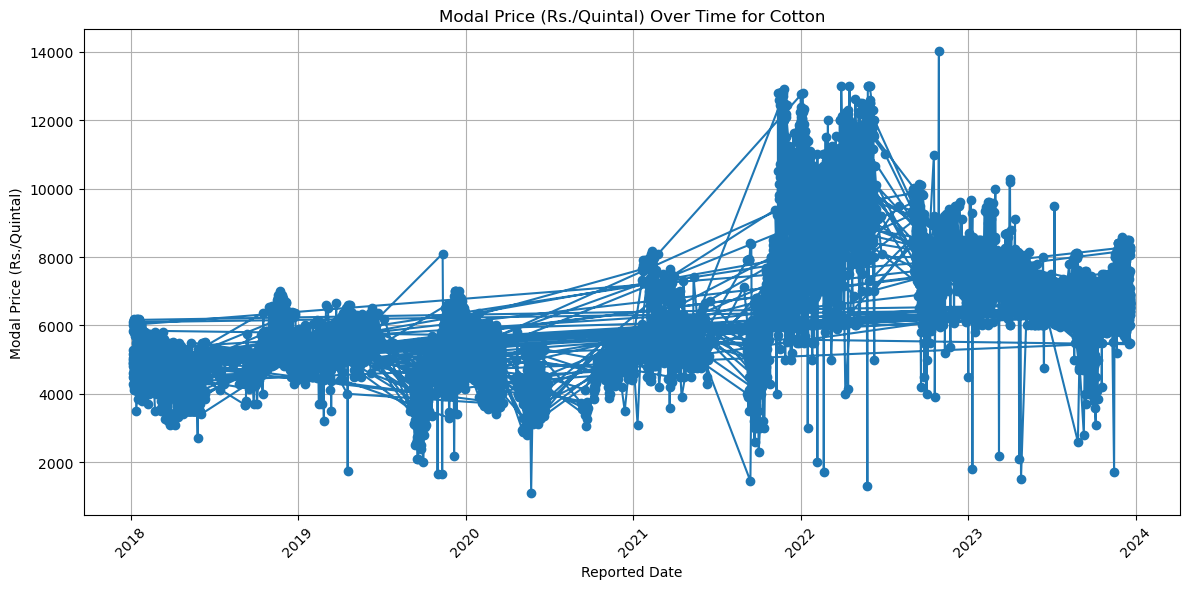

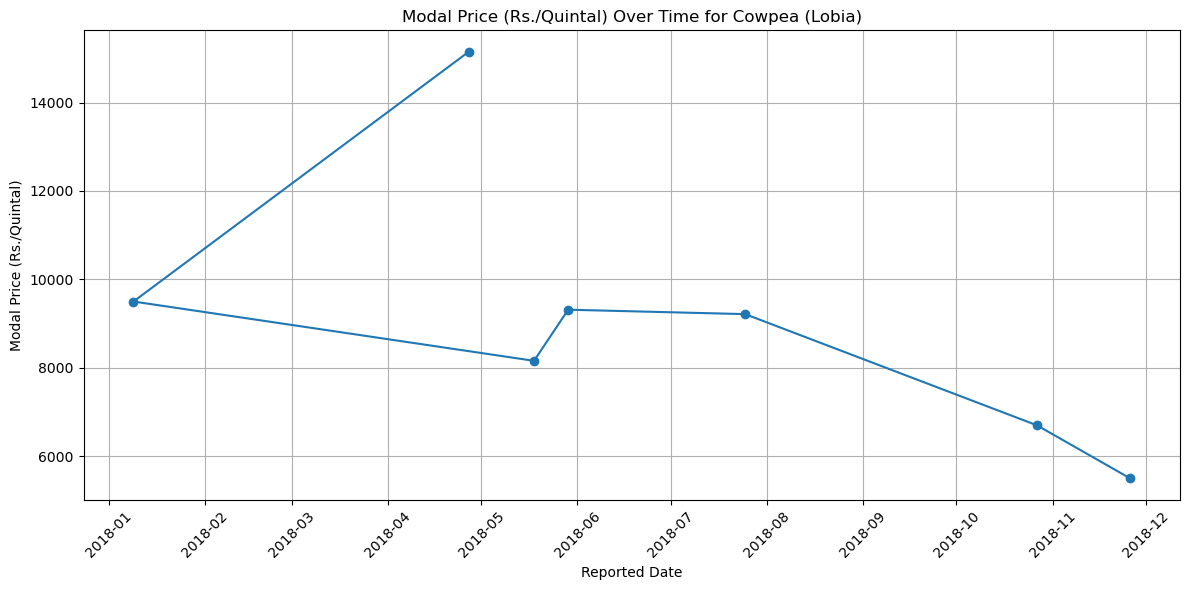

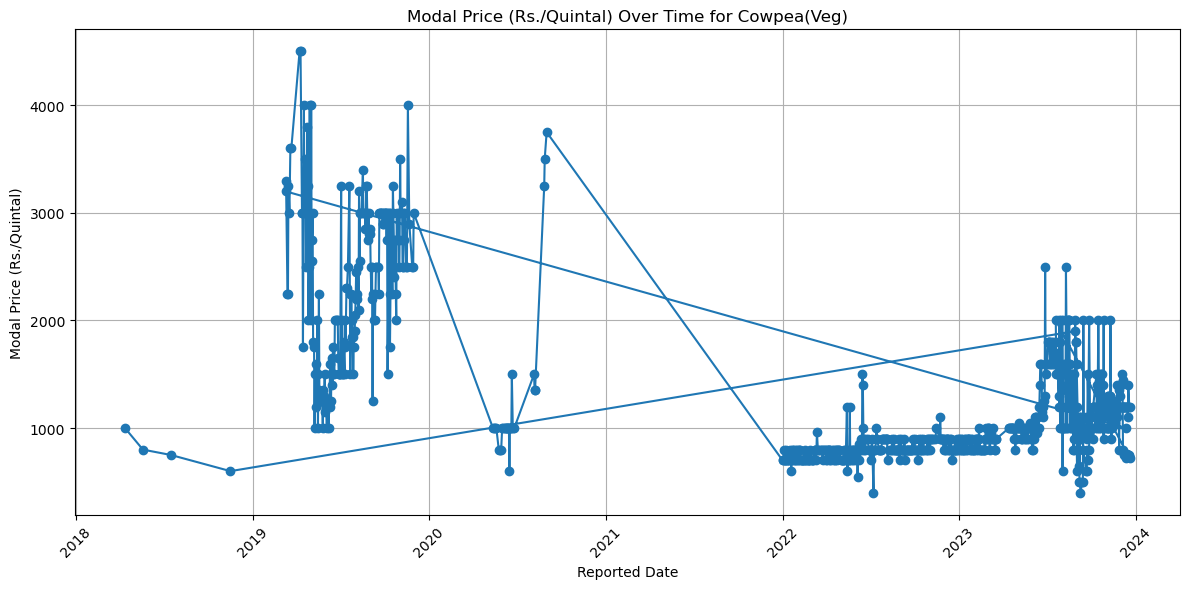

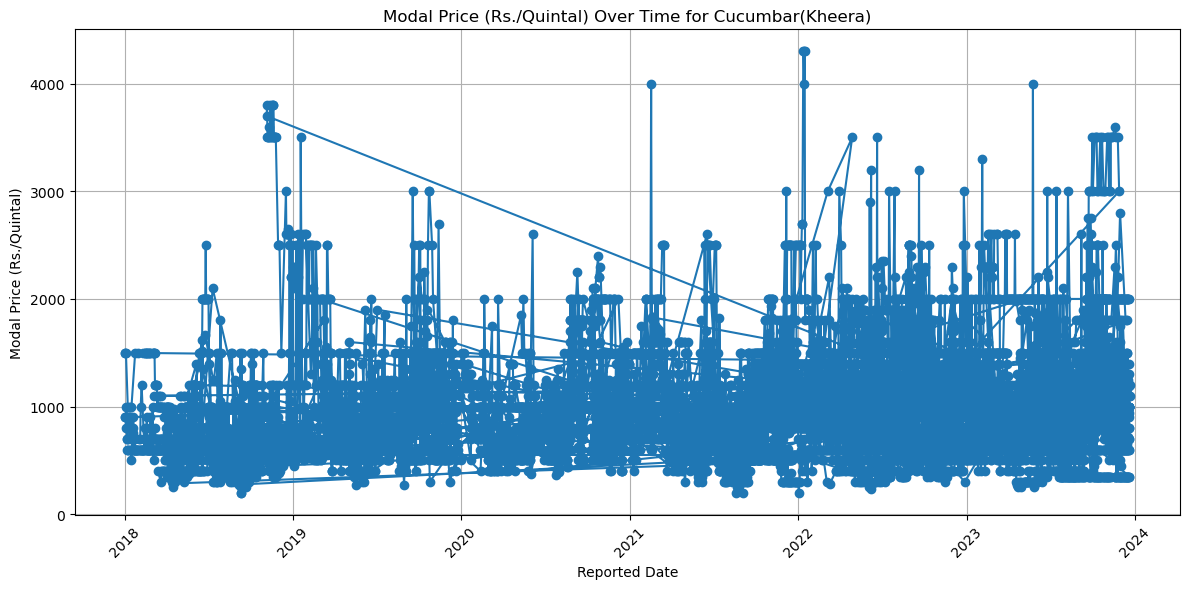

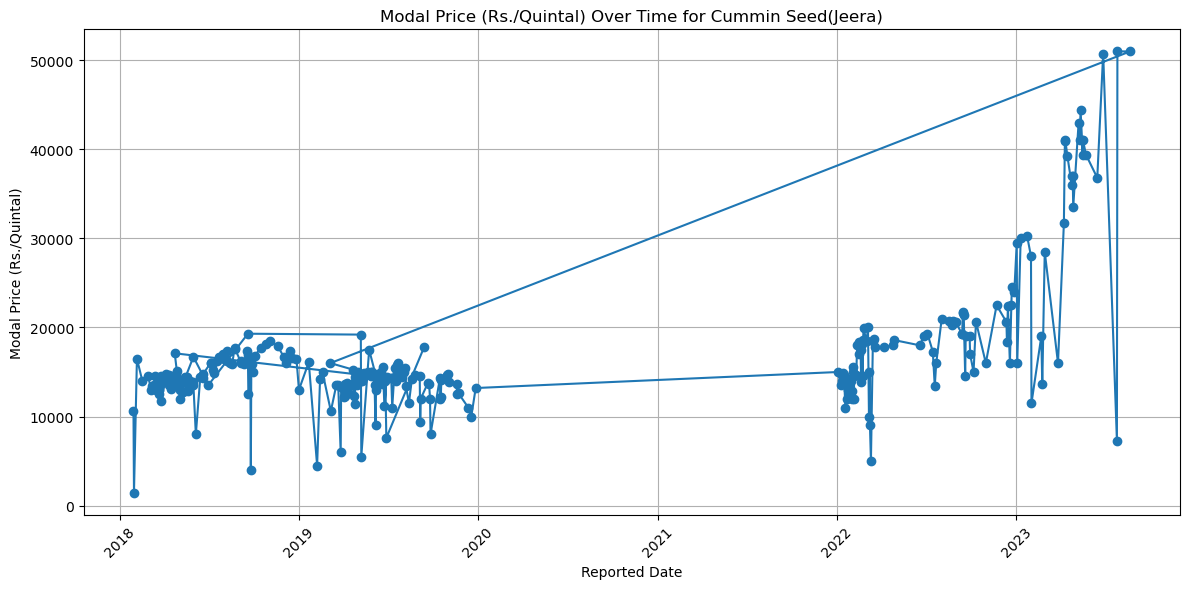

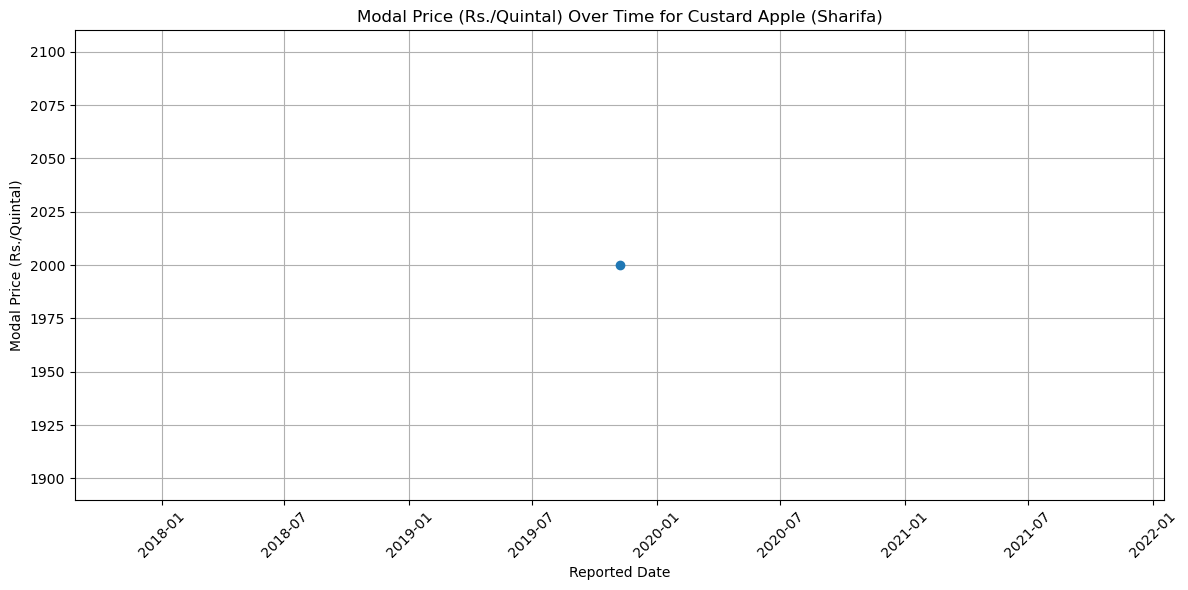

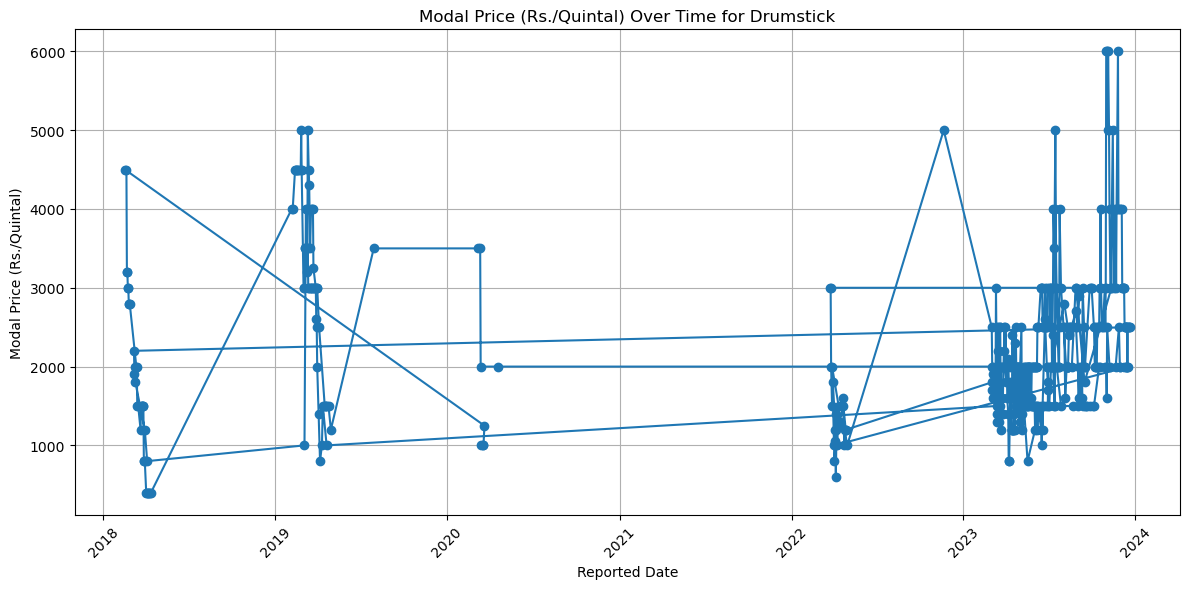

In [53]:
# Visualization based on corp type

import pandas as pd
import matplotlib.pyplot as plt



# Convert 'Reported Date' column to datetime format with specified format
df['Reported Date'] = pd.to_datetime(df['Reported Date'], format='%d-%b-%y')

# Iterate over each crop type
for crop_type in ['Cotton', 'Cowpea (Lobia)', 'Cowpea(Veg)', 'Cucumbar(Kheera)', 'Cummin Seed(Jeera)', 'Custard Apple (Sharifa)', 'Drumstick']:
    # Filter the DataFrame for the current crop type
    crop_df = df[df['crop_type'] == crop_type]
    
    # Plot modal price over time for the current crop type
    plt.figure(figsize=(12, 6))
    plt.plot(crop_df['Reported Date'], crop_df['Modal Price (Rs./Quintal)'], marker='o', linestyle='-')
    plt.title(f'Modal Price (Rs./Quintal) Over Time for {crop_type}')
    plt.xlabel('Reported Date')
    plt.ylabel('Modal Price (Rs./Quintal)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Visualisation based on District and Corp type.

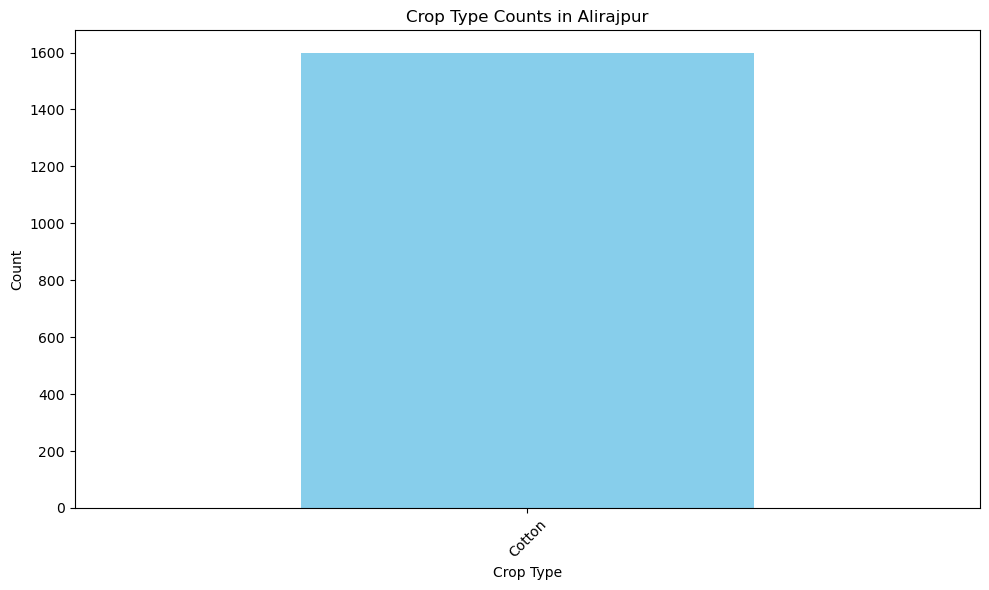

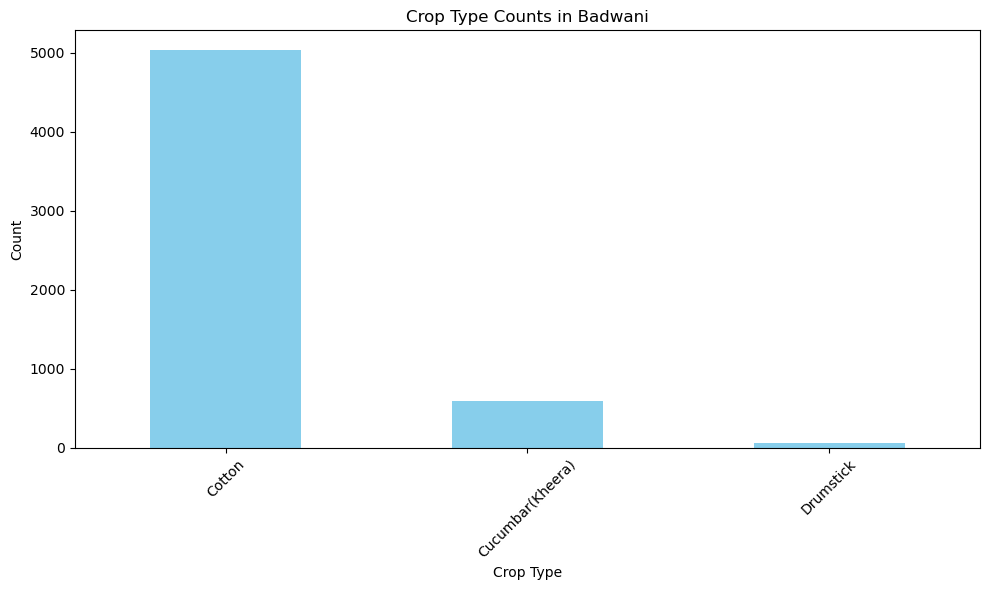

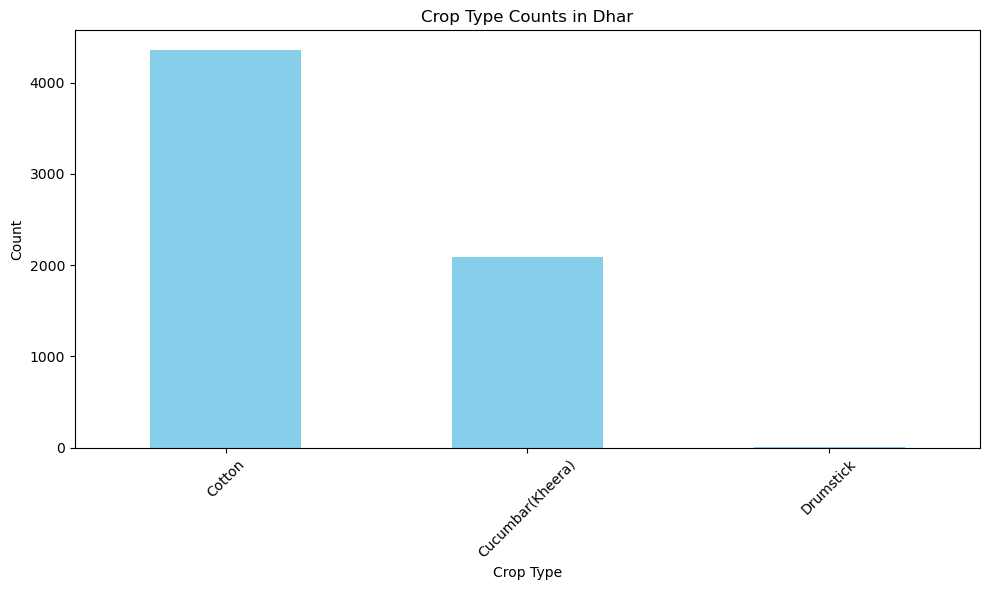

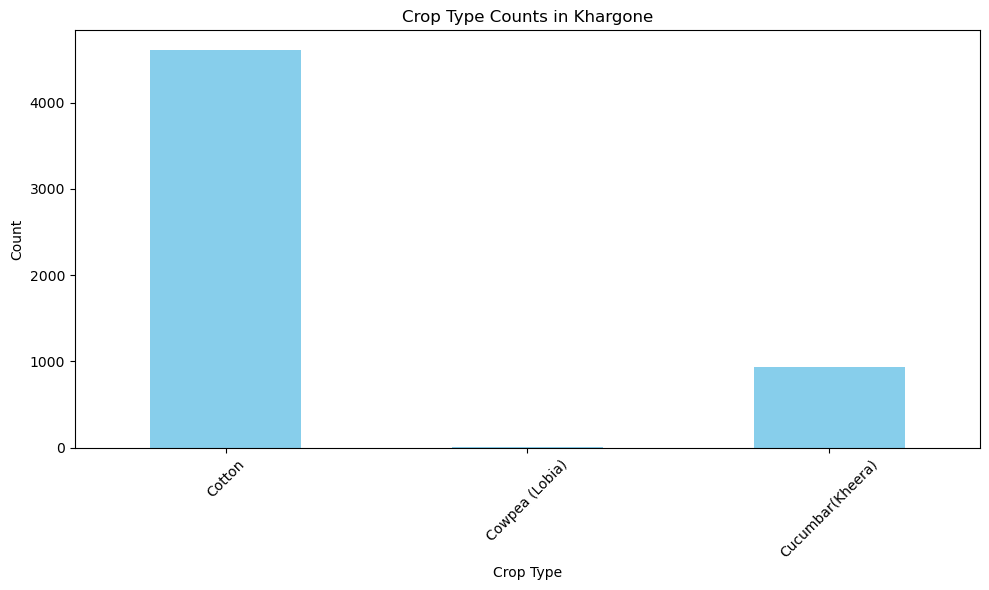

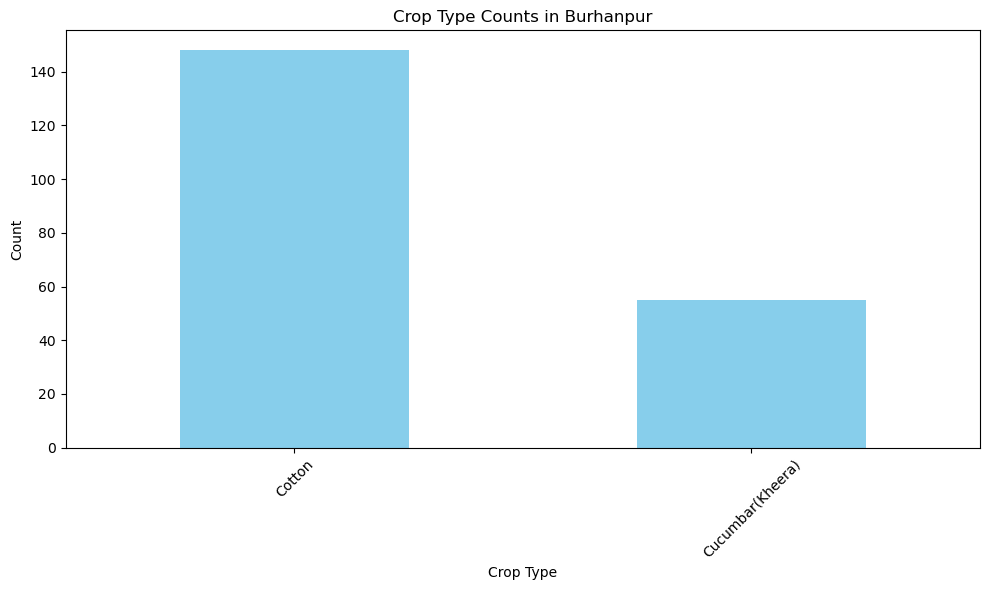

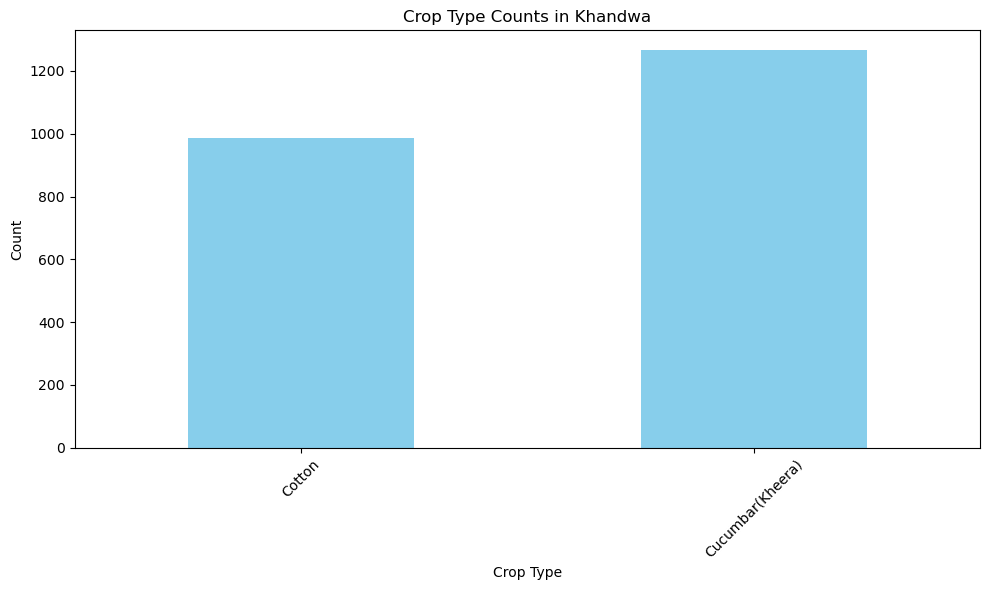

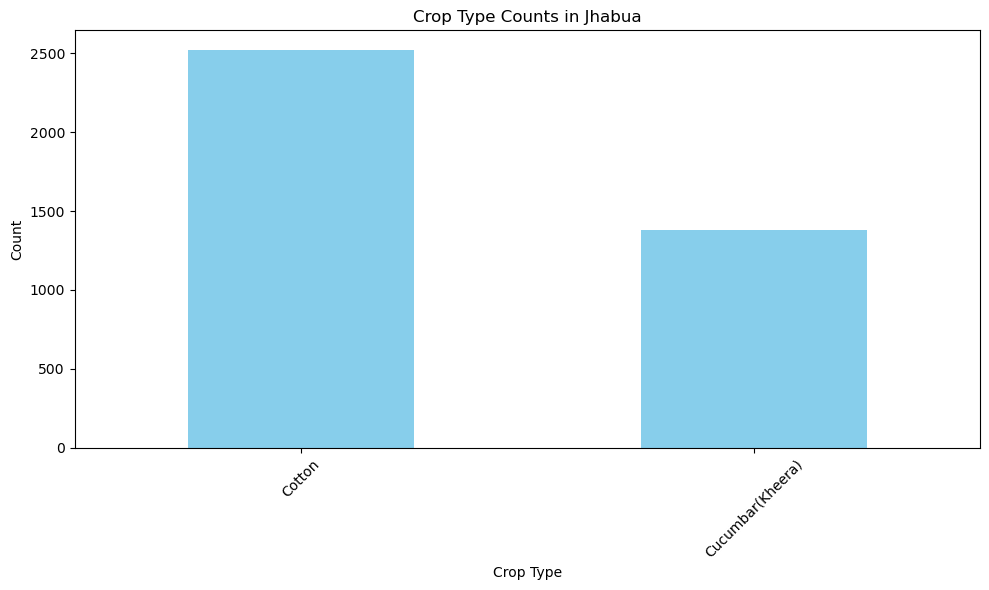

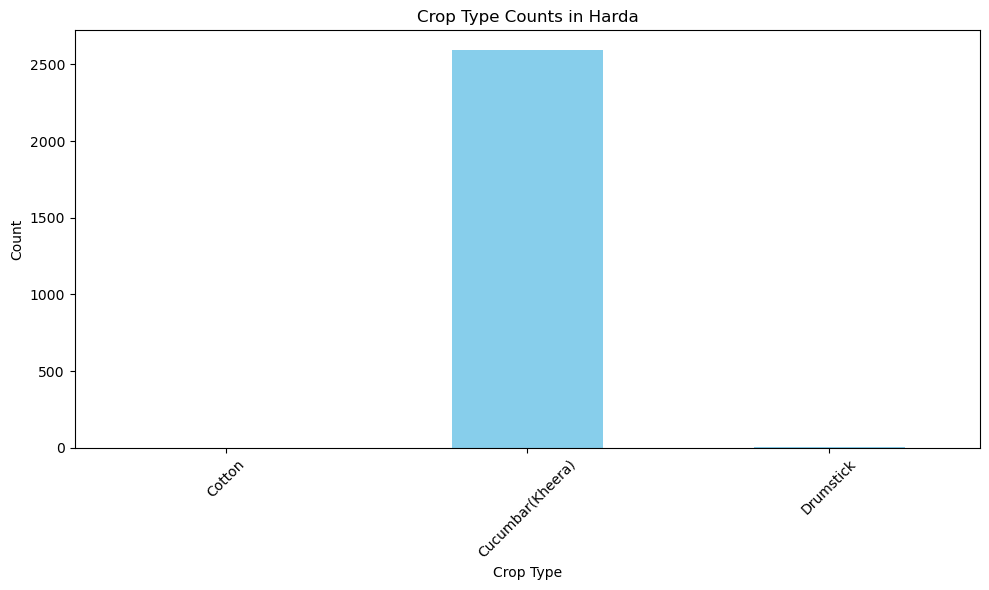

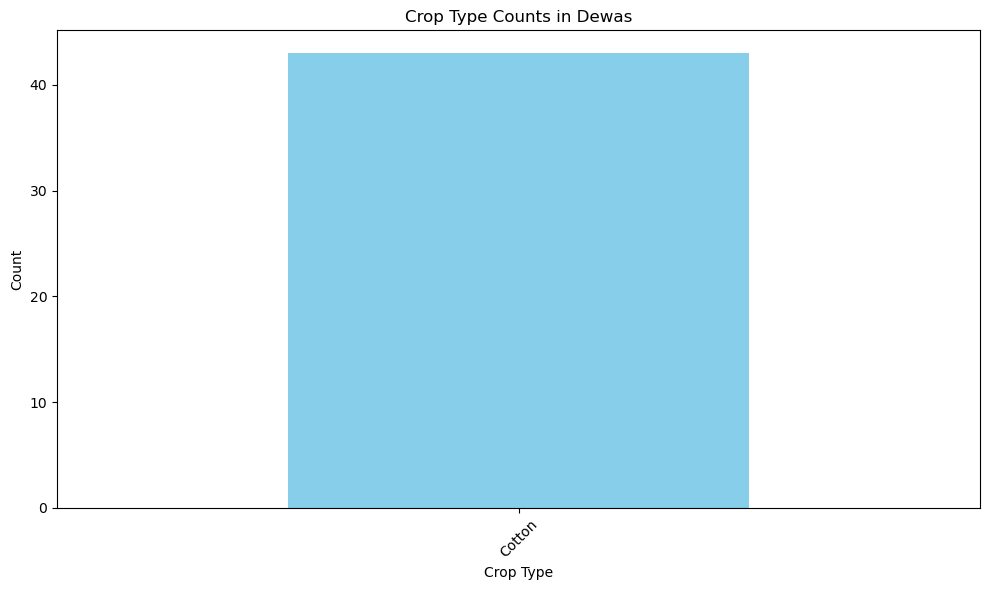

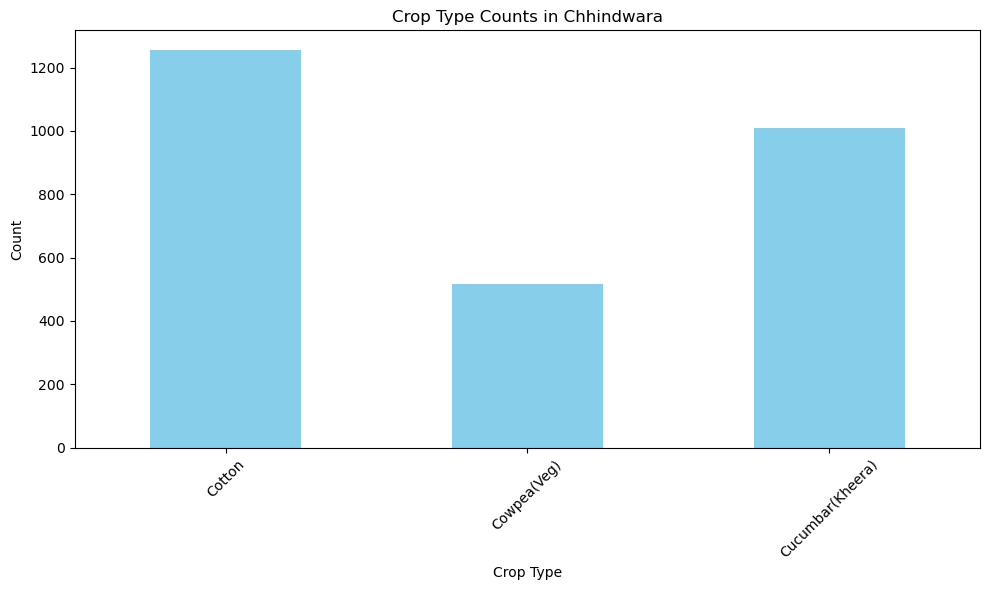

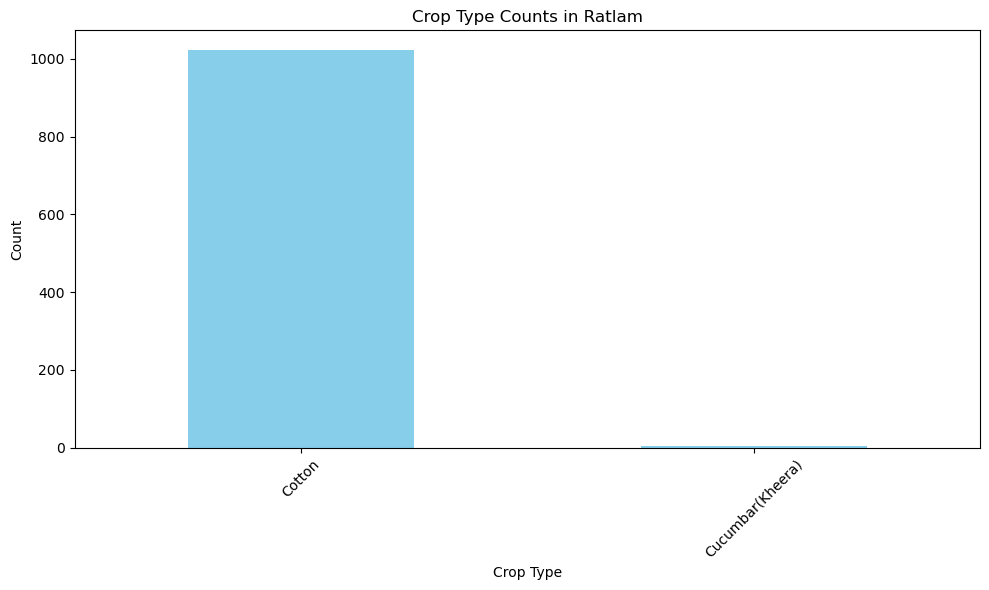

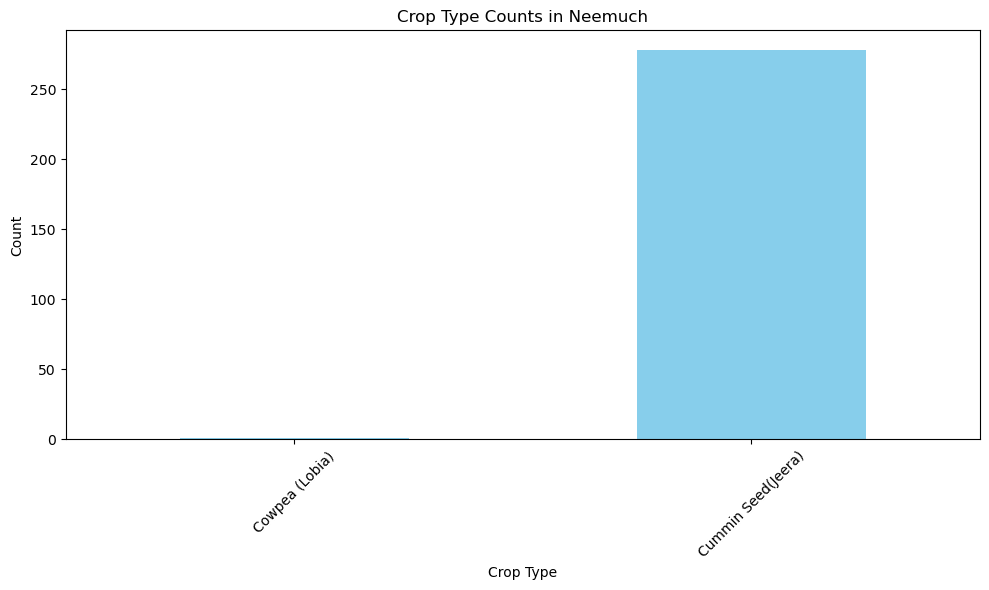

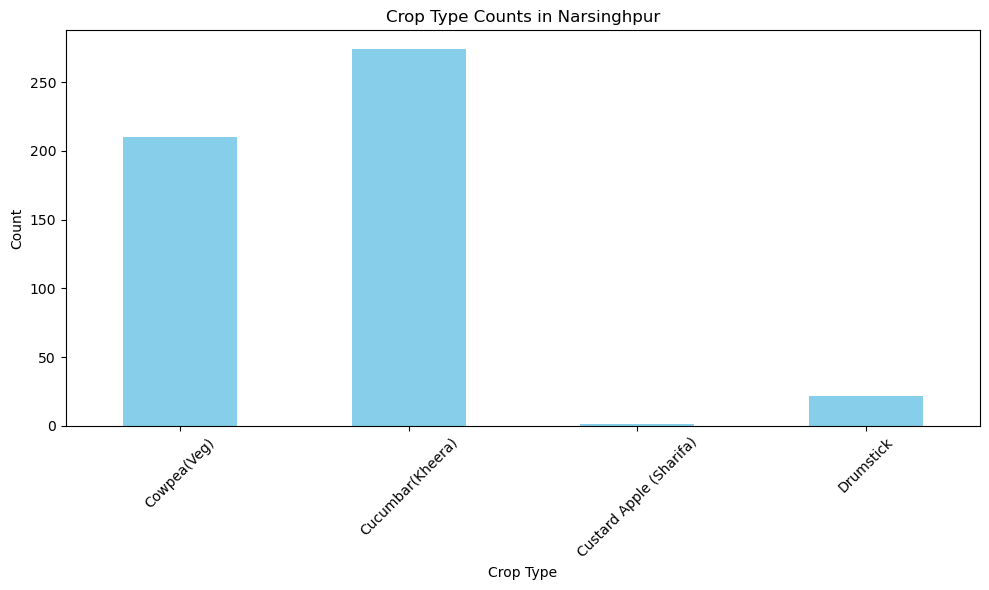

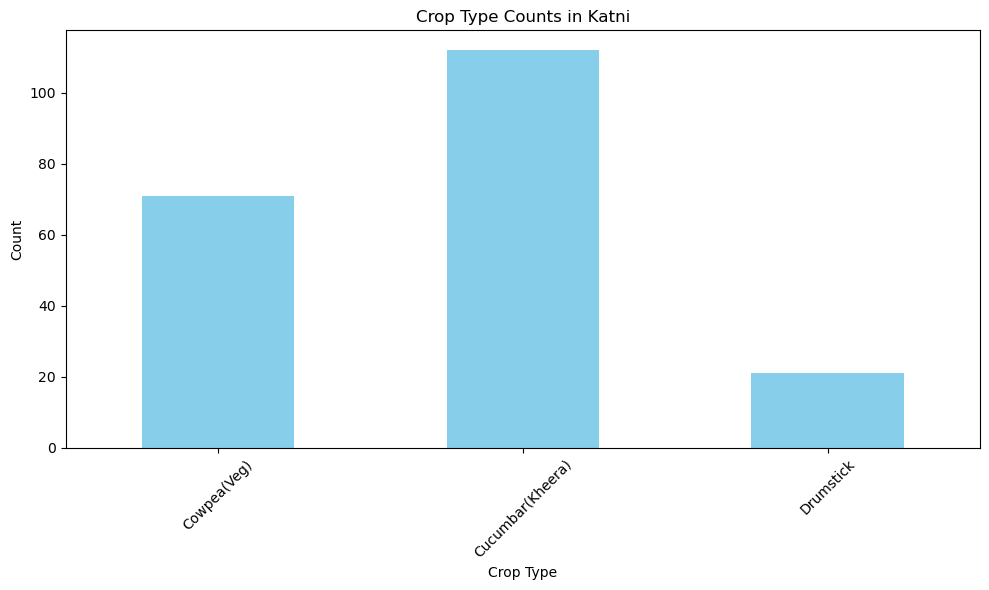

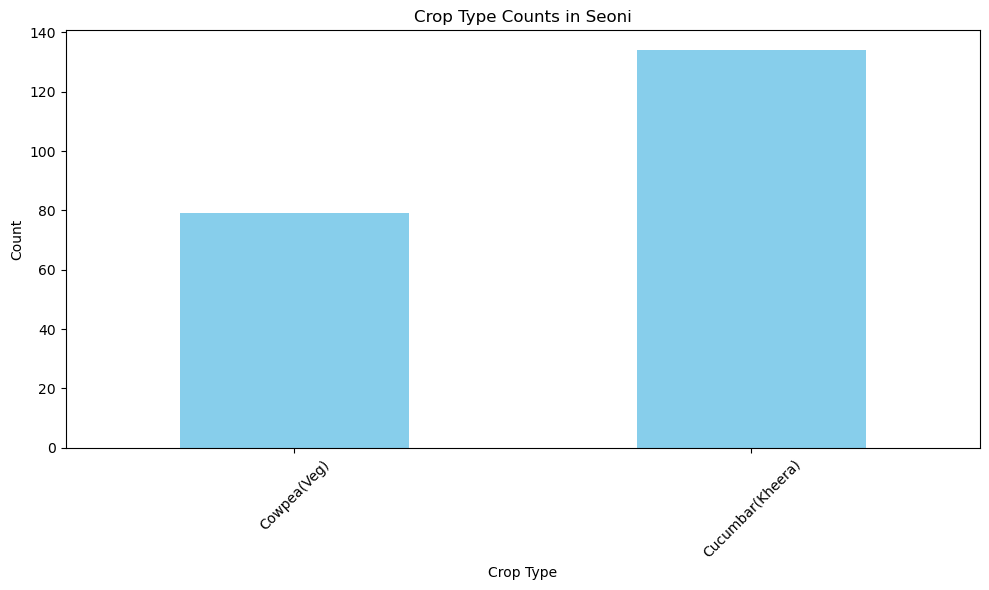

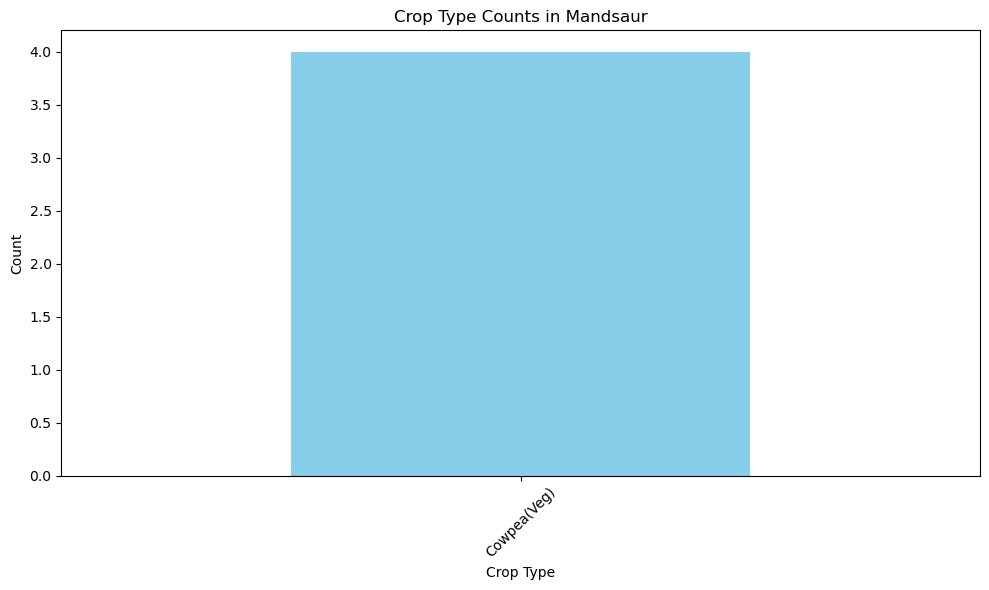

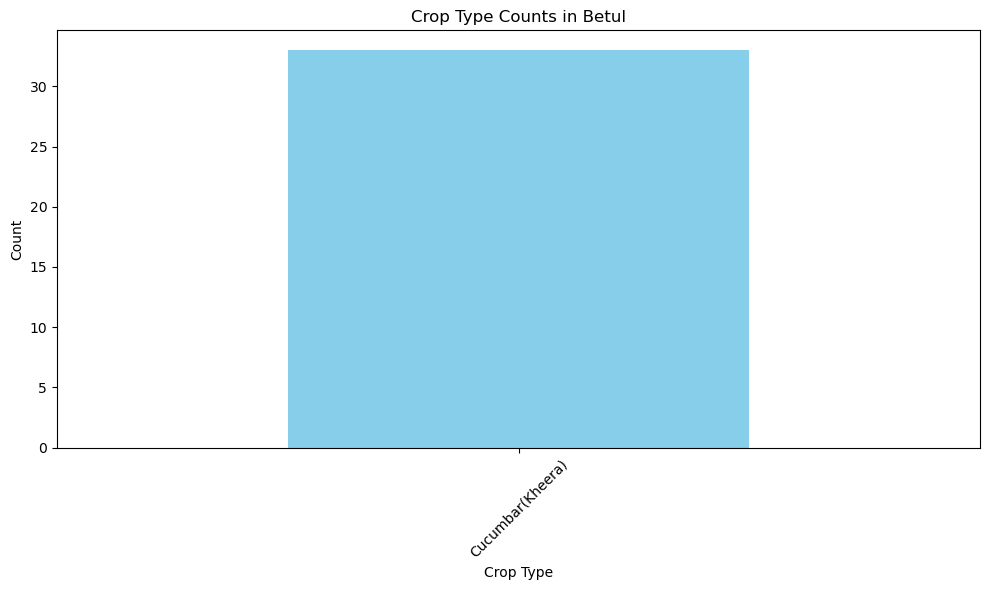

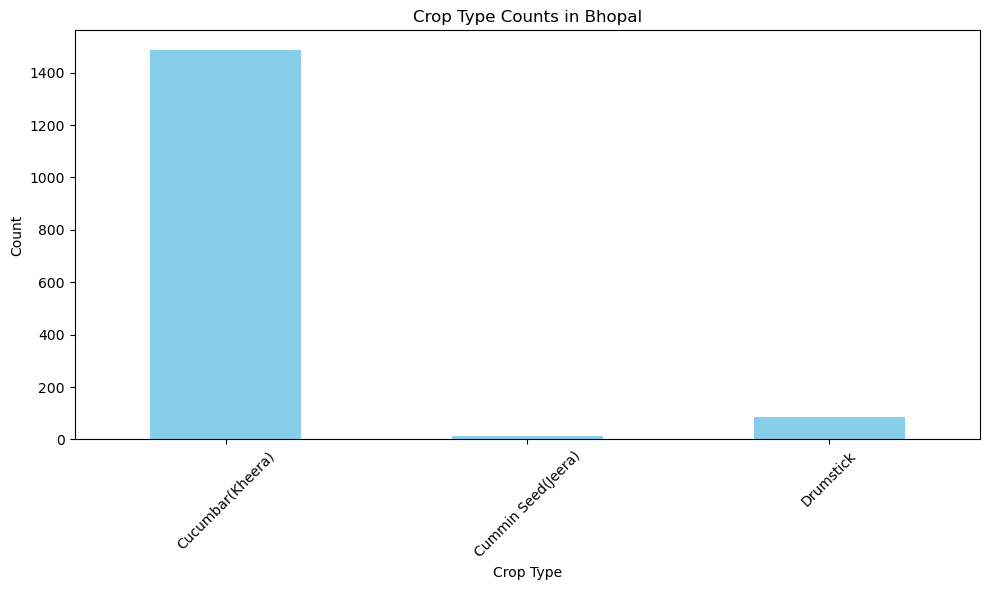

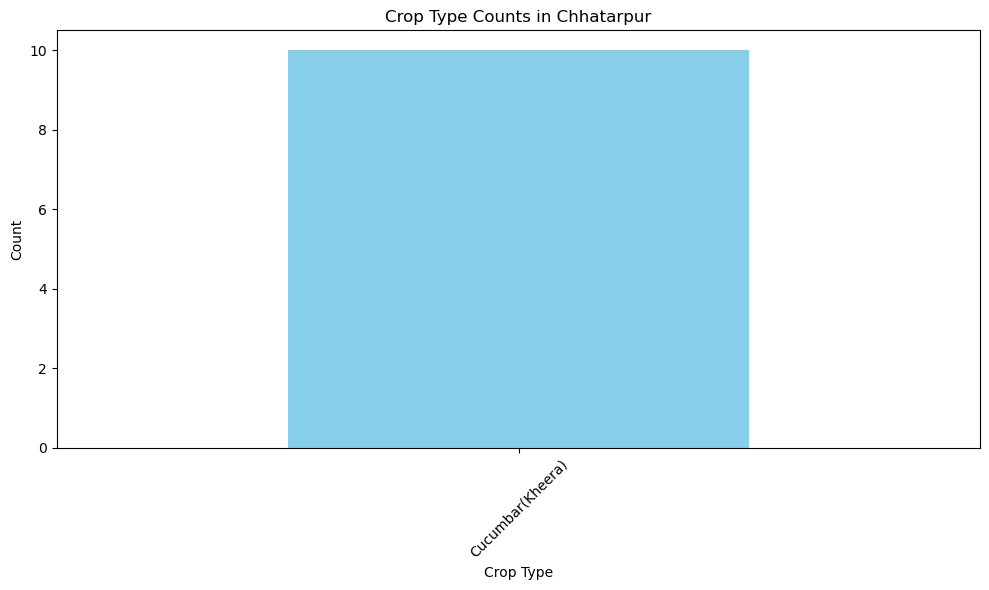

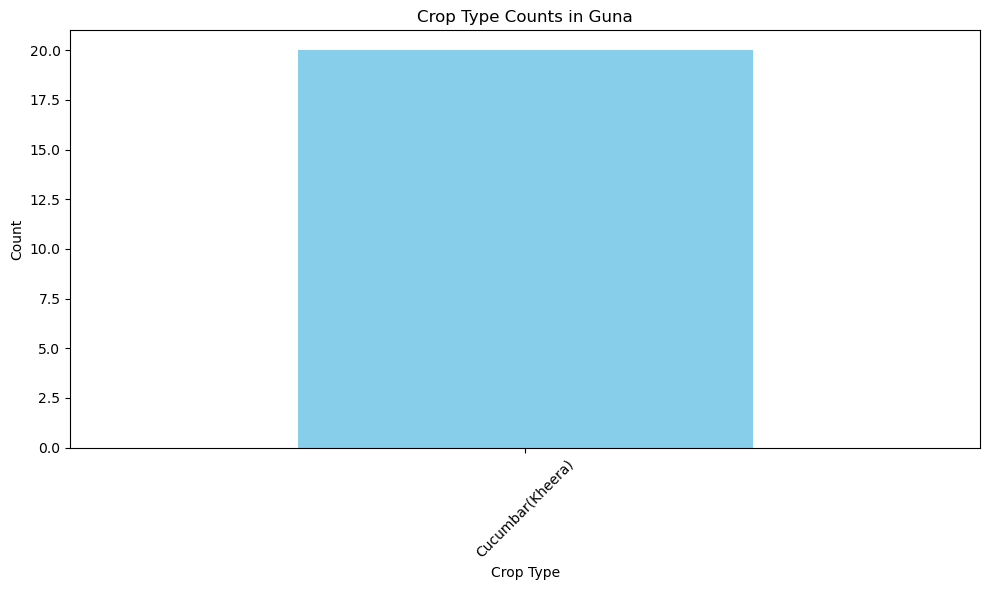

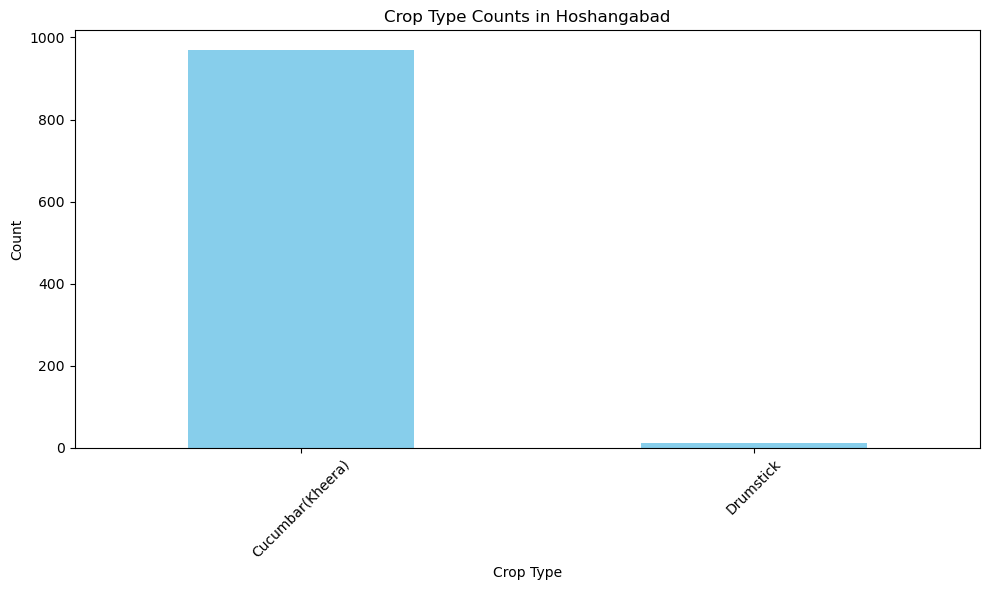

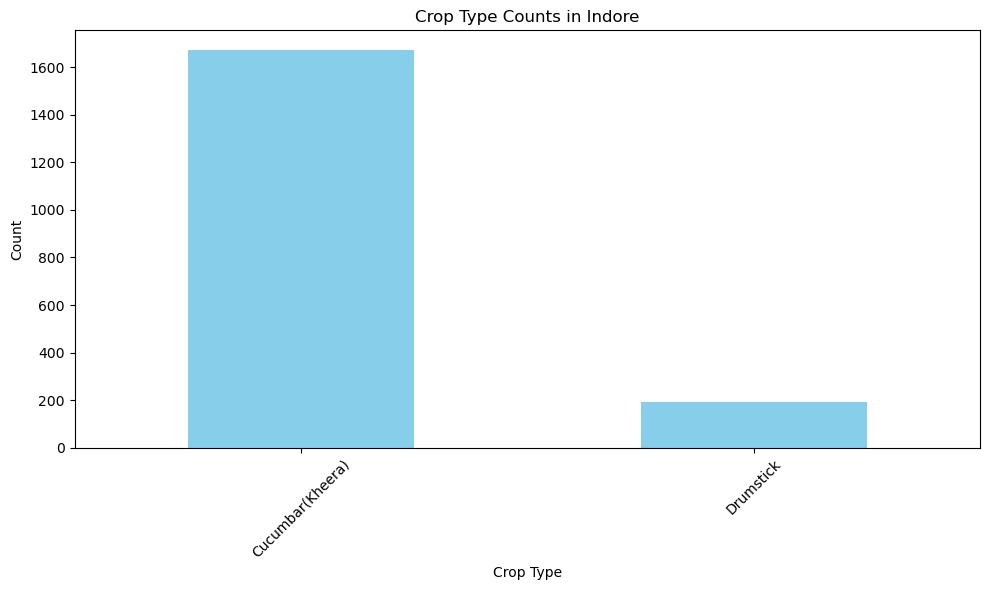

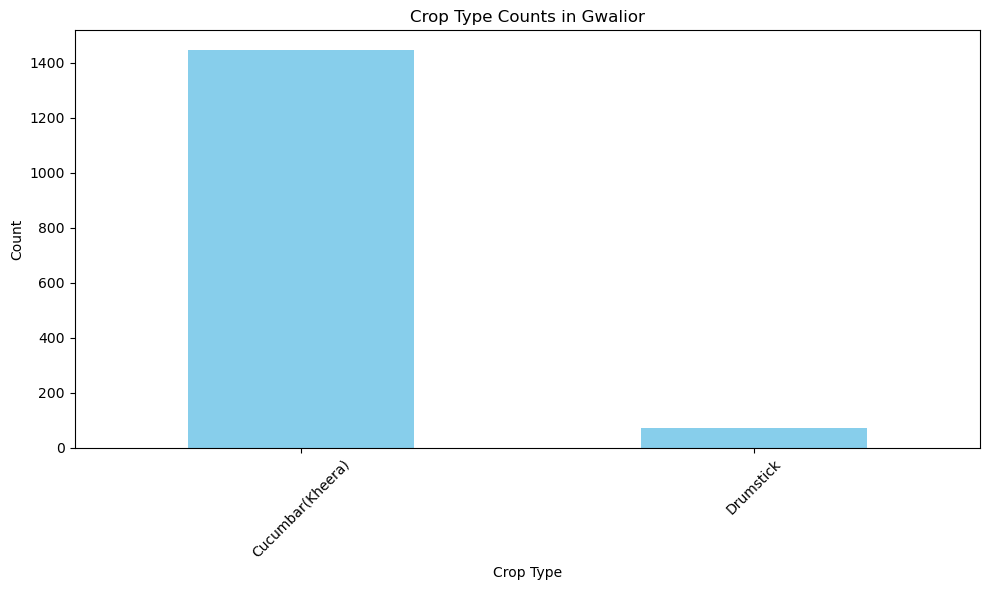

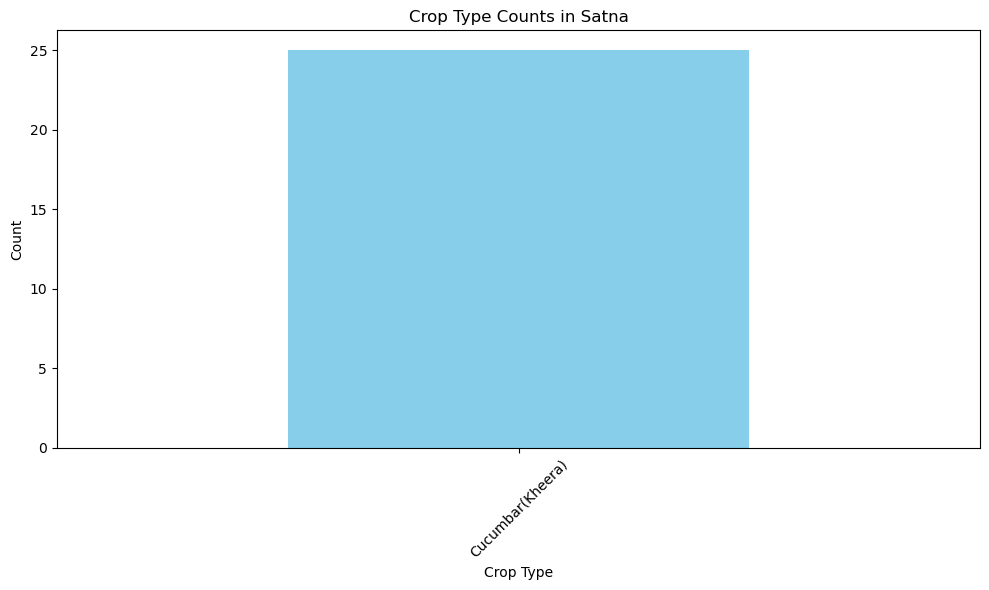

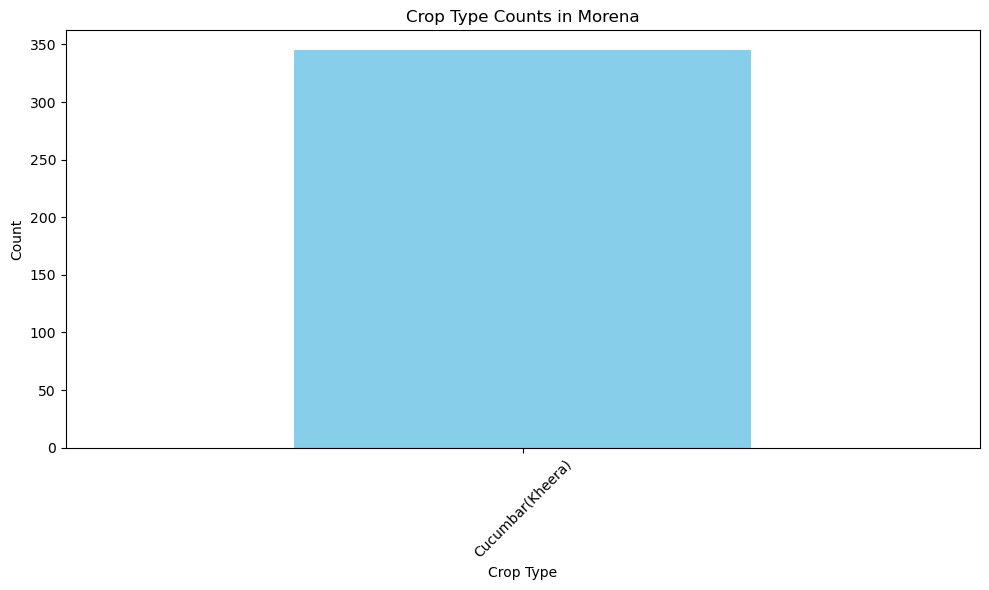

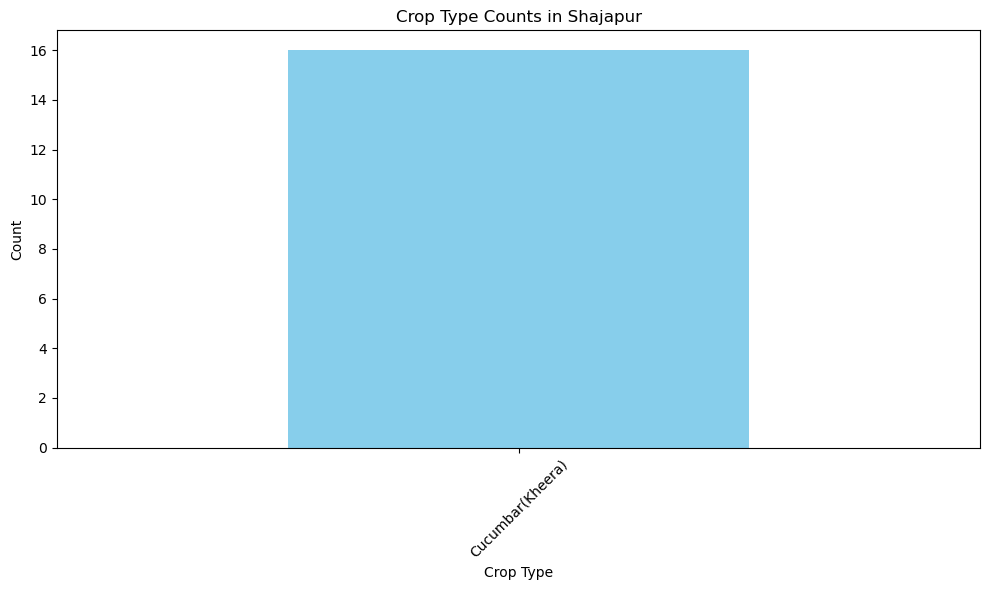

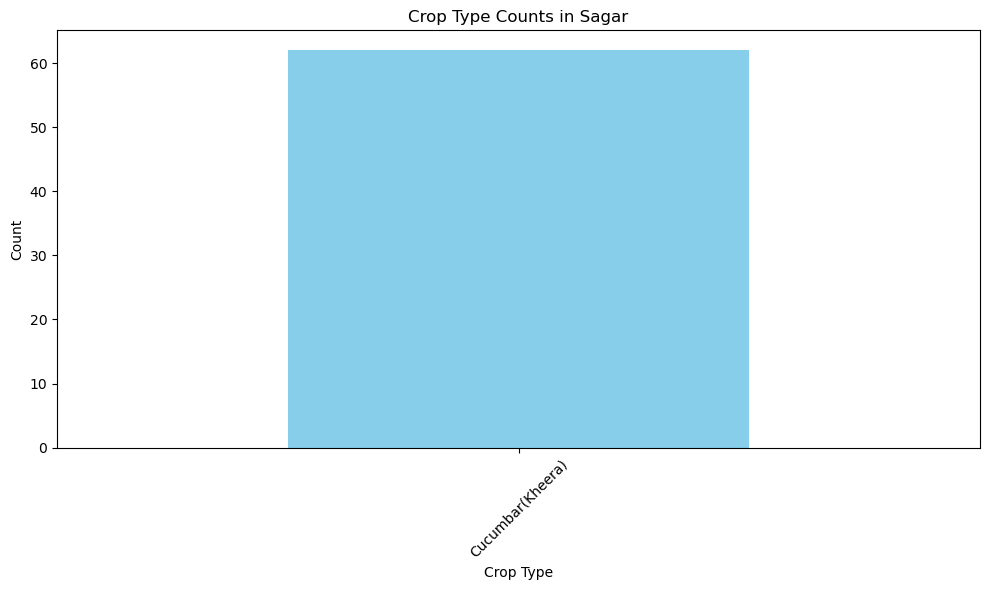

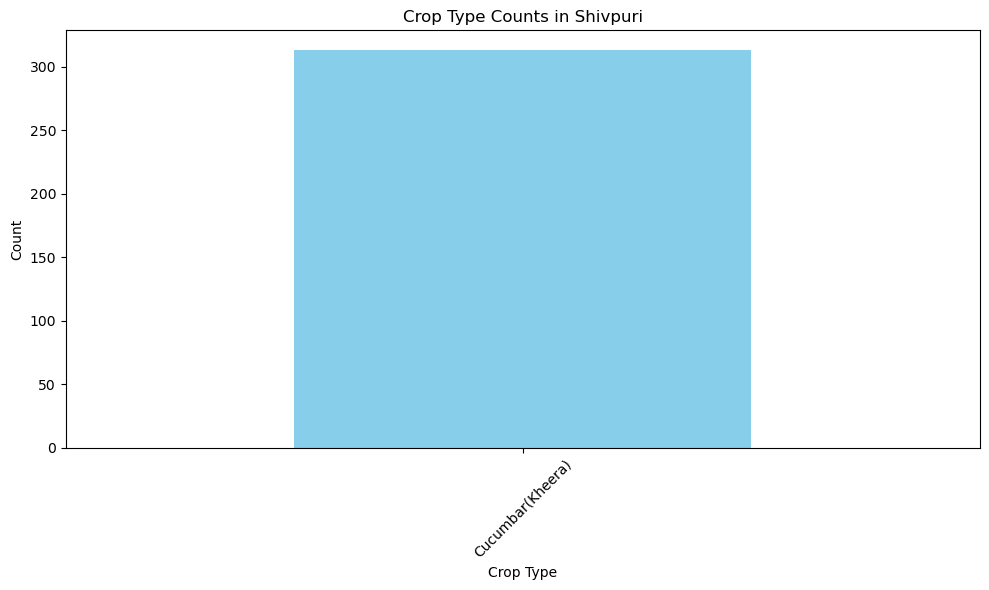

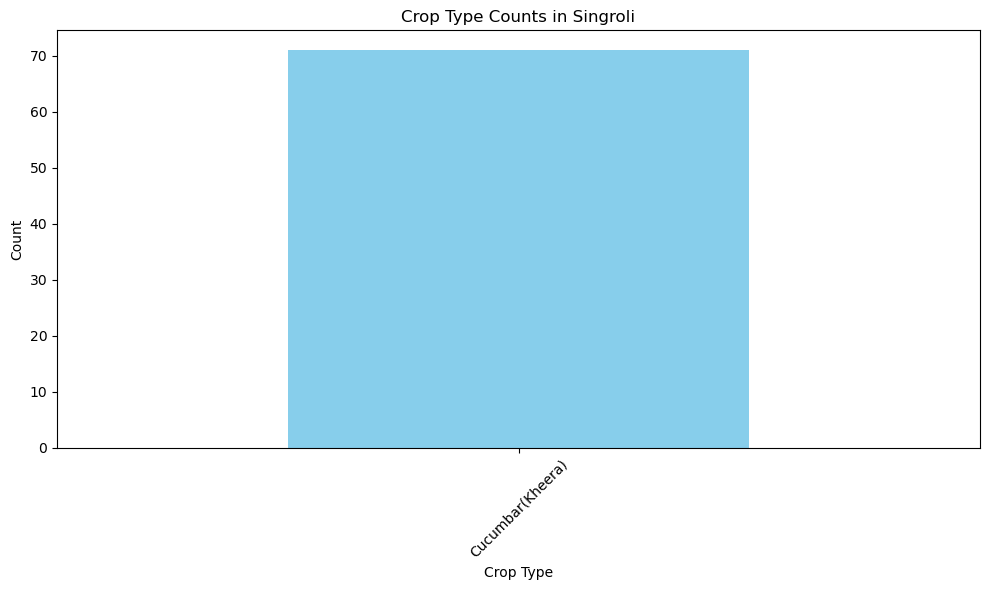

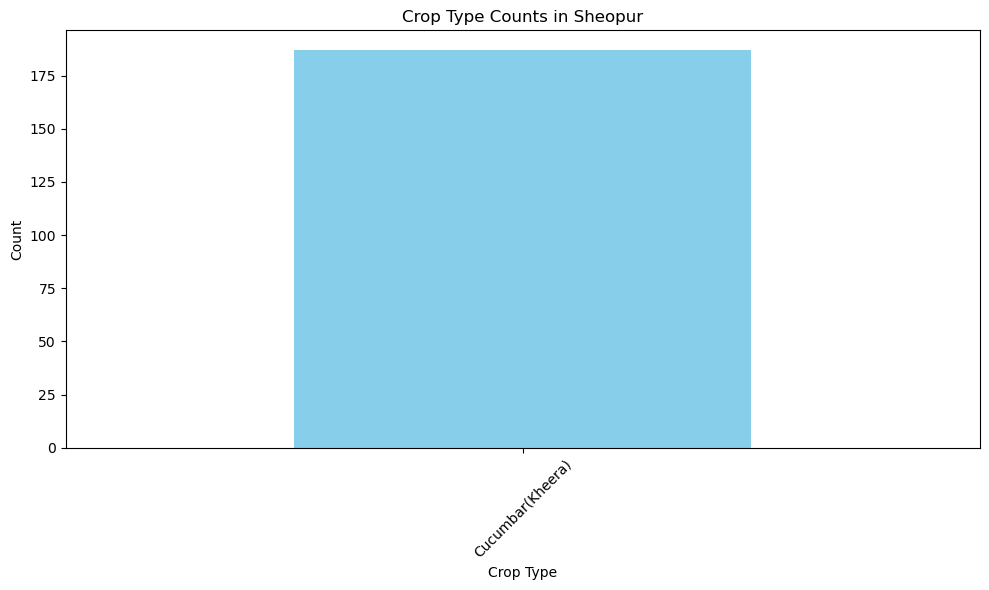

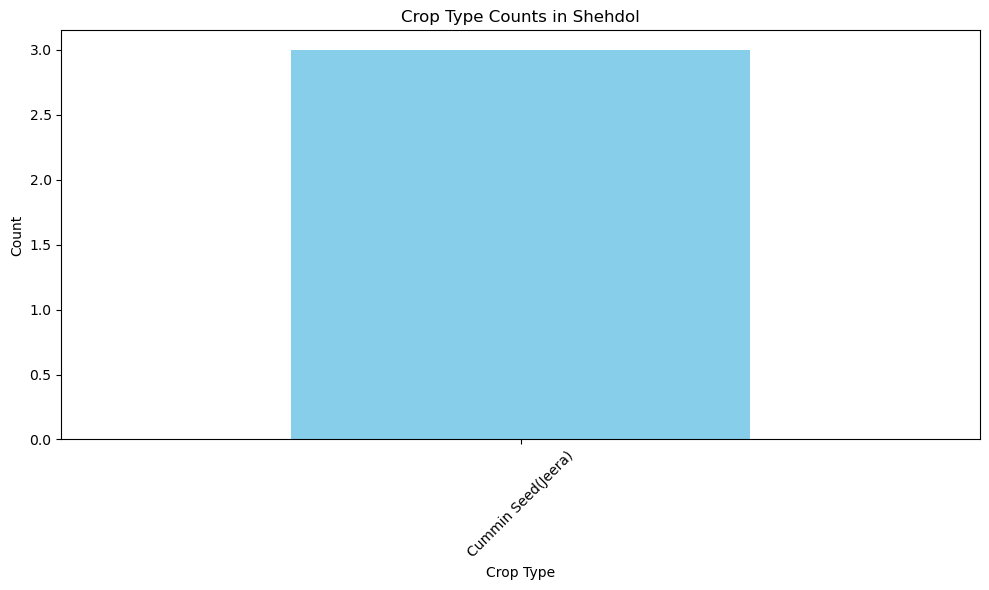

In [56]:
# Visualisation based on 'District Name'

for district in df['District Name'].unique():
    # Filter the data for the current district
    district_data = df[df['District Name'] == district]
    
    # Group the data by crop_type and calculate the count
    crop_type_counts = district_data.groupby('crop_type').size()
    
    # Create a bar plot for crop_type counts for the current district
    plt.figure(figsize=(10, 6))
    crop_type_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Crop Type Counts in {district}')
    plt.xlabel('Crop Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [64]:
# Initialize a dictionary to store the data
district_crop_dict = {}

# Iterate over each district
for district in df['District Name'].unique():
    district_data = df[df['District Name'] == district]
    unique_corps = district_data['crop_type'].unique()
    
    # Store the unique crop types for the district in the dictionary
    district_crop_dict[district] = list(unique_corps)

# Print the dictionary
print(district_crop_dict)



{'Alirajpur': ['Cotton'], 'Badwani': ['Cotton', 'Cucumbar(Kheera)', 'Drumstick'], 'Dhar': ['Cotton', 'Cucumbar(Kheera)', 'Drumstick'], 'Khargone': ['Cotton', 'Cowpea (Lobia)', 'Cucumbar(Kheera)'], 'Burhanpur': ['Cotton', 'Cucumbar(Kheera)'], 'Khandwa': ['Cotton', 'Cucumbar(Kheera)'], 'Jhabua': ['Cotton', 'Cucumbar(Kheera)'], 'Harda': ['Cotton', 'Cucumbar(Kheera)', 'Drumstick'], 'Dewas': ['Cotton'], 'Chhindwara': ['Cotton', 'Cowpea(Veg)', 'Cucumbar(Kheera)'], 'Ratlam': ['Cotton', 'Cucumbar(Kheera)'], 'Neemuch': ['Cowpea (Lobia)', 'Cummin Seed(Jeera)'], 'Narsinghpur': ['Cowpea(Veg)', 'Cucumbar(Kheera)', 'Custard Apple (Sharifa)', 'Drumstick'], 'Katni': ['Cowpea(Veg)', 'Cucumbar(Kheera)', 'Drumstick'], 'Seoni': ['Cowpea(Veg)', 'Cucumbar(Kheera)'], 'Mandsaur': ['Cowpea(Veg)'], 'Betul': ['Cucumbar(Kheera)'], 'Bhopal': ['Cucumbar(Kheera)', 'Cummin Seed(Jeera)', 'Drumstick'], 'Chhatarpur': ['Cucumbar(Kheera)'], 'Guna': ['Cucumbar(Kheera)'], 'Hoshangabad': ['Cucumbar(Kheera)', 'Drumstick'], 'I

In [73]:
df.head()
# Check data types of relevant columns
# print(df.dtypes)


,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,crop_type
0,Madhya Pradesh,Alirajpur,Alirajpur,Desi,Fibre Crops,58.2,5500,7000,6500,2023-12-20,Cotton
1,Madhya Pradesh,Alirajpur,Alirajpur,Desi,Fibre Crops,62.1,6000,7000,6500,2023-12-19,Cotton
2,Madhya Pradesh,Alirajpur,Alirajpur,Desi,Fibre Crops,33,5500,7000,6500,2023-12-18,Cotton
3,Madhya Pradesh,Alirajpur,Alirajpur,Desi,Fibre Crops,85.3,6200,6801,6500,2023-12-17,Cotton
4,Madhya Pradesh,Alirajpur,Alirajpur,Desi,Fibre Crops,66.8,6200,6811,6600,2023-12-16,Cotton


In [92]:
# function that will remove all the comma(',') from the data.

def remove_commas_and_convert_to_float(value):
    # If the value is already a float, return it as is
    if isinstance(value, float):
        return value
    
    # Remove commas from the string and convert it to float
    return float(value.replace(',', ''))



df['Arrivals (Tonnes)'] = df['Arrivals (Tonnes)'].apply(remove_commas_and_convert_to_float)
print(df.dtypes)

State Name                           object
District Name                        object
Market Name                          object
Variety                              object
Group                                object
Arrivals (Tonnes)                   float64
Min Price (Rs./Quintal)               int64
Max Price (Rs./Quintal)               int64
Modal Price (Rs./Quintal)             int64
Reported Date                datetime64[ns]
crop_type                            object
dtype: object


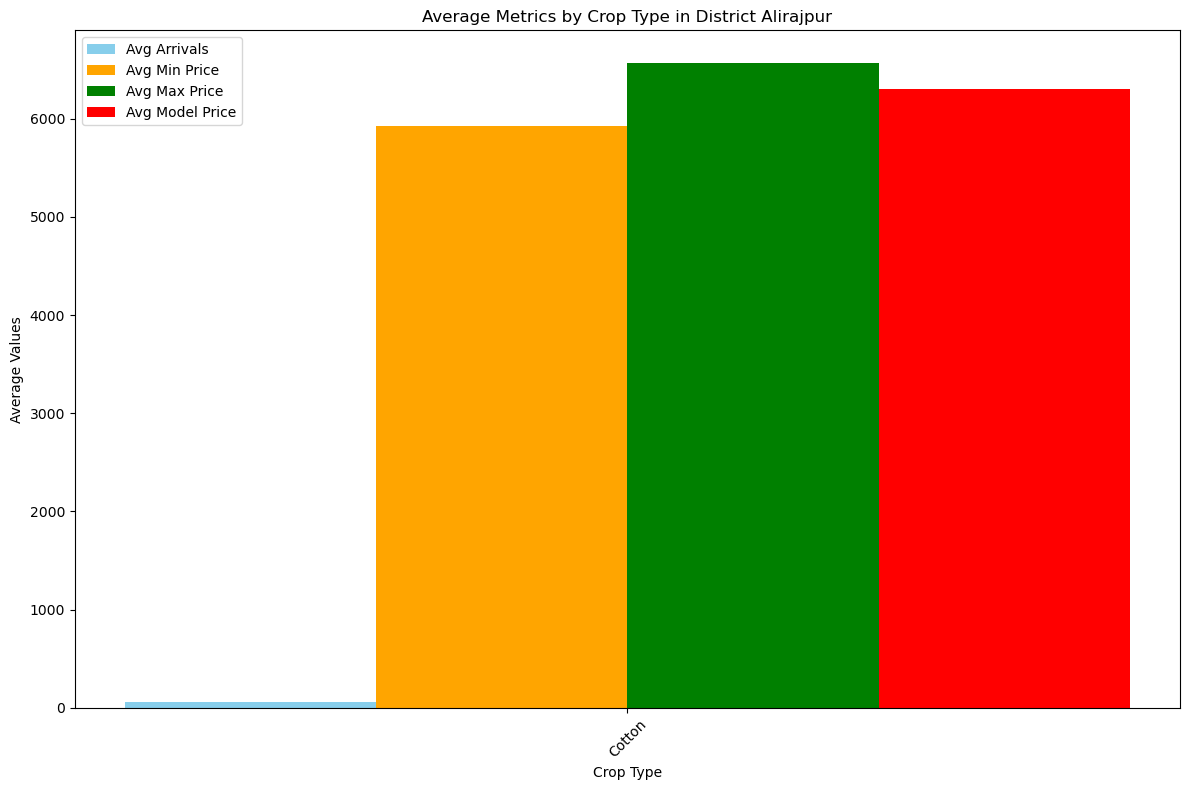

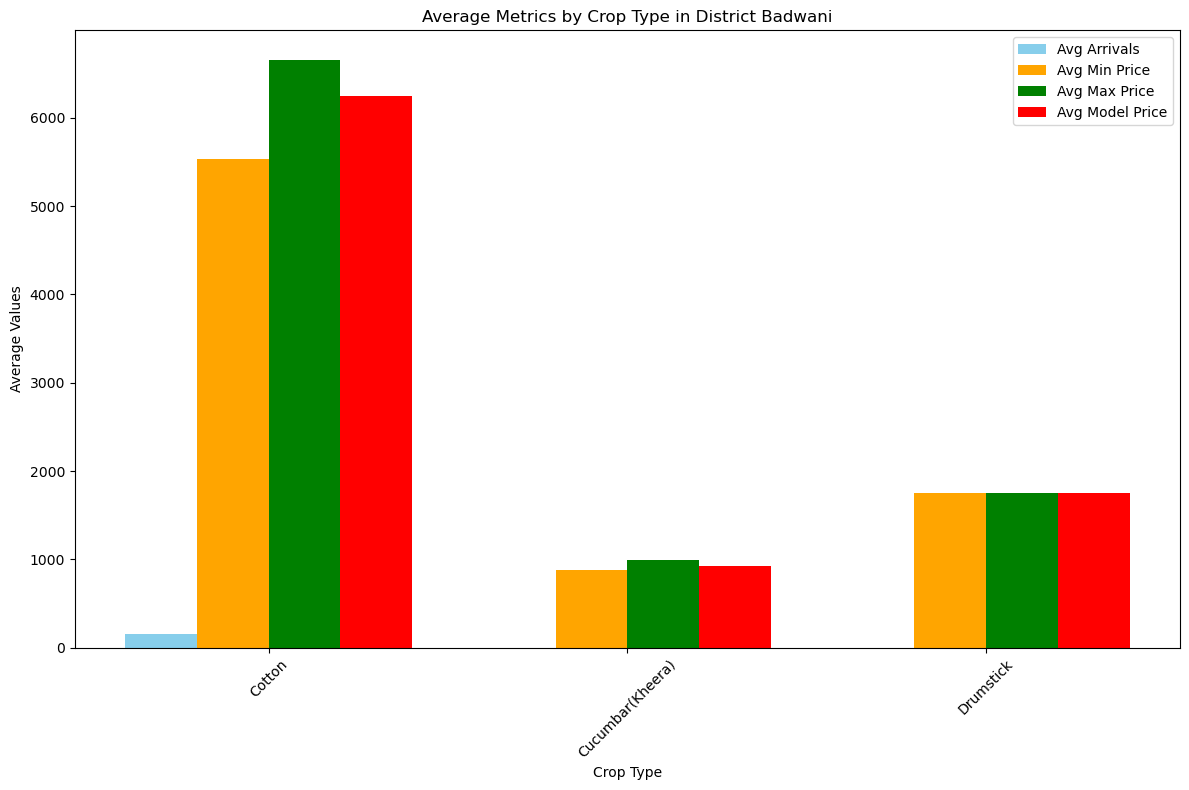

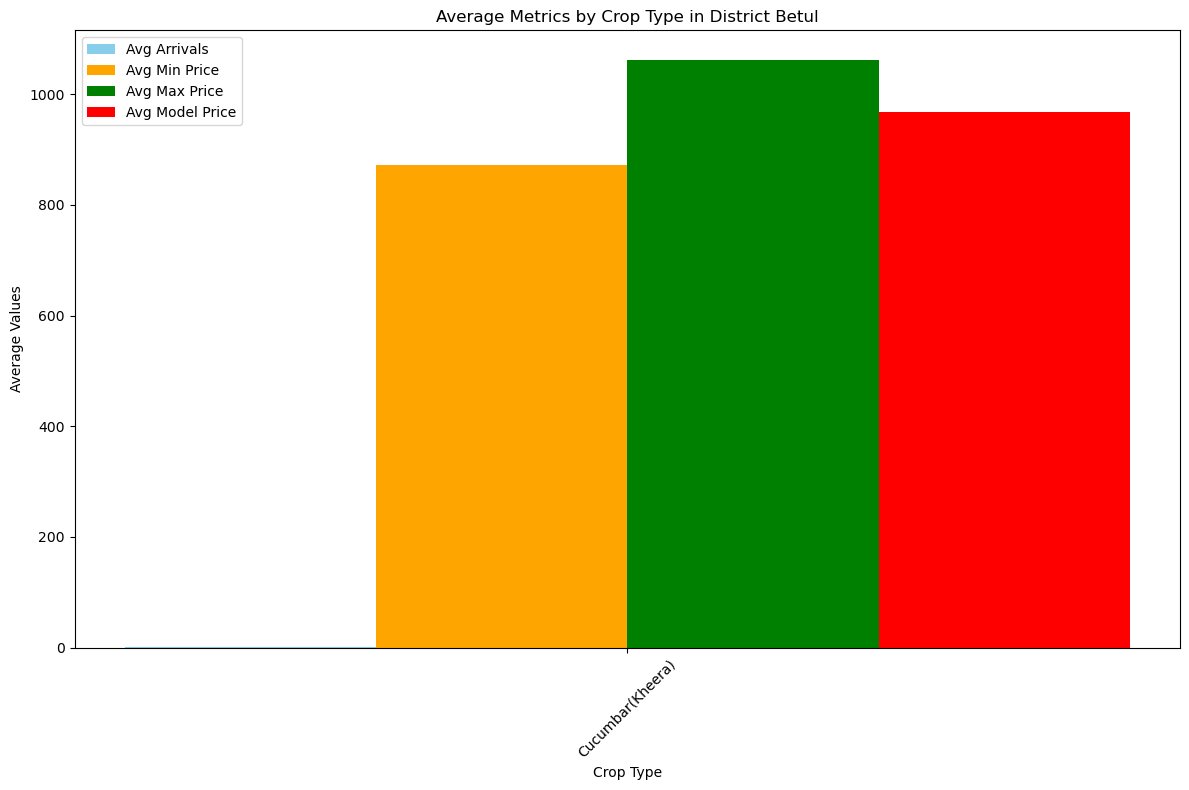

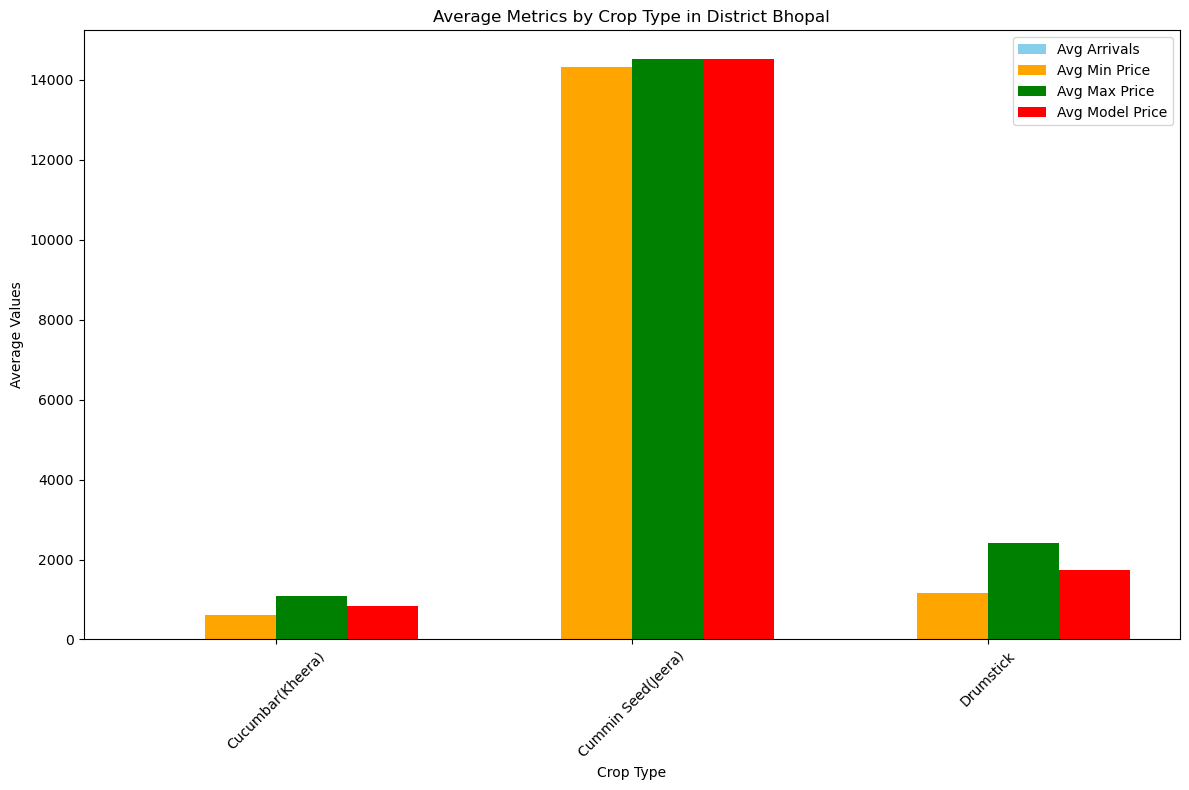

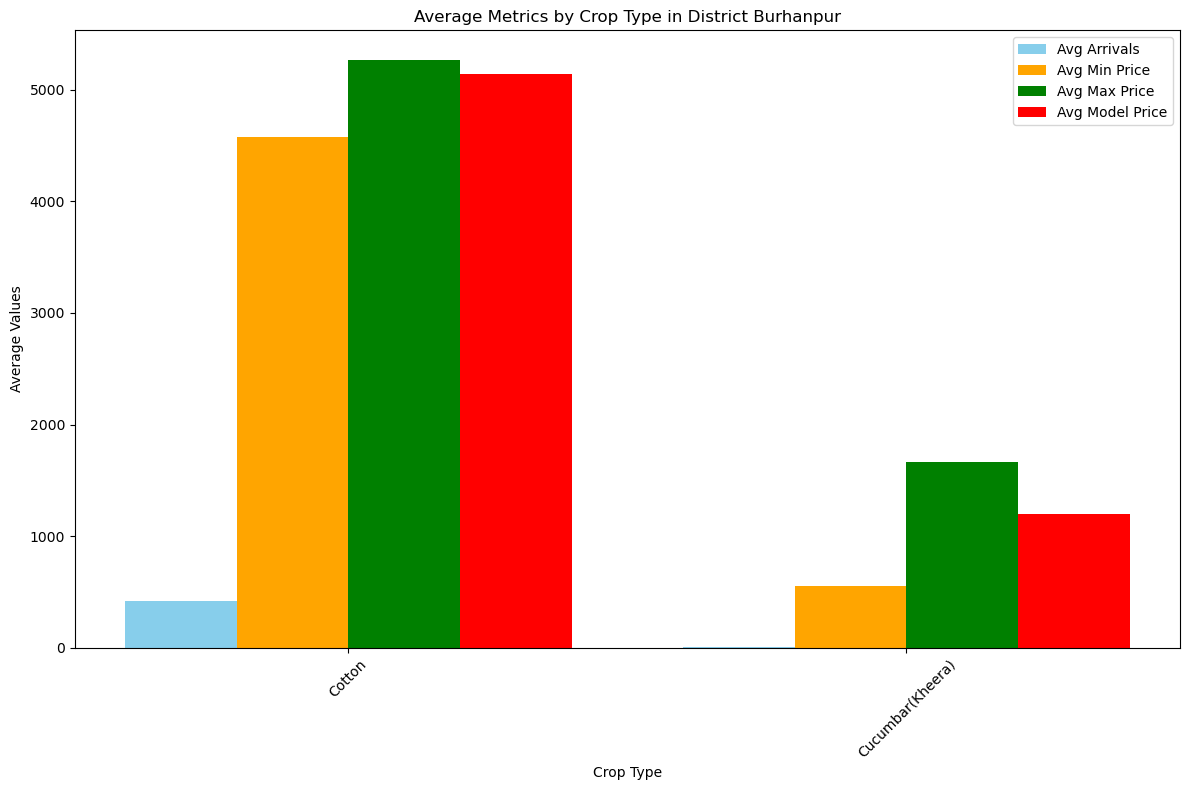

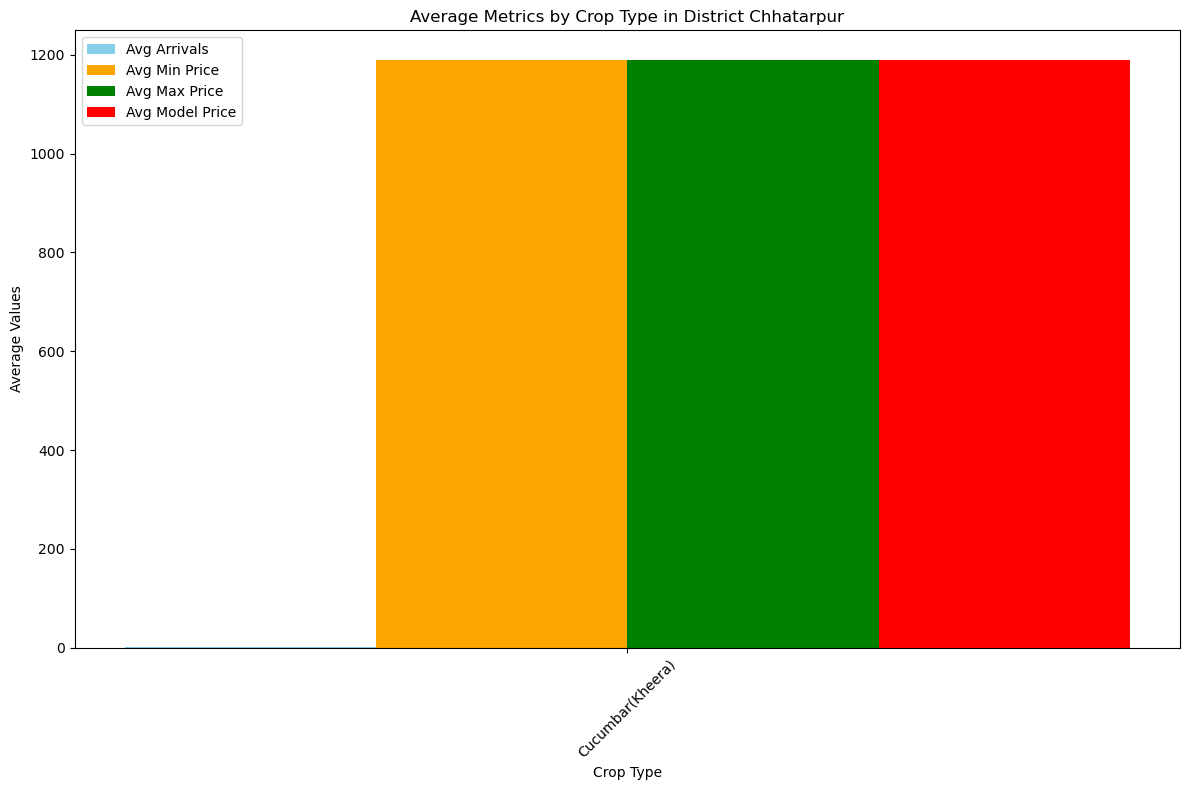

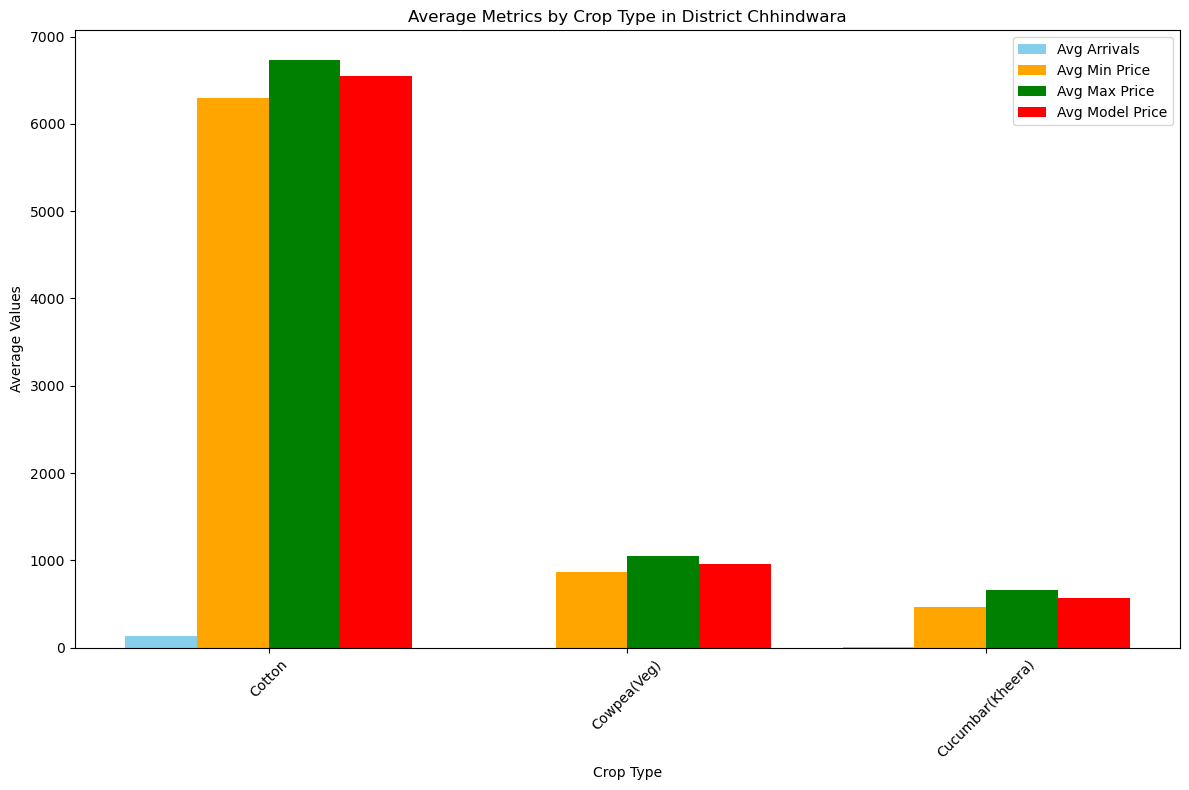

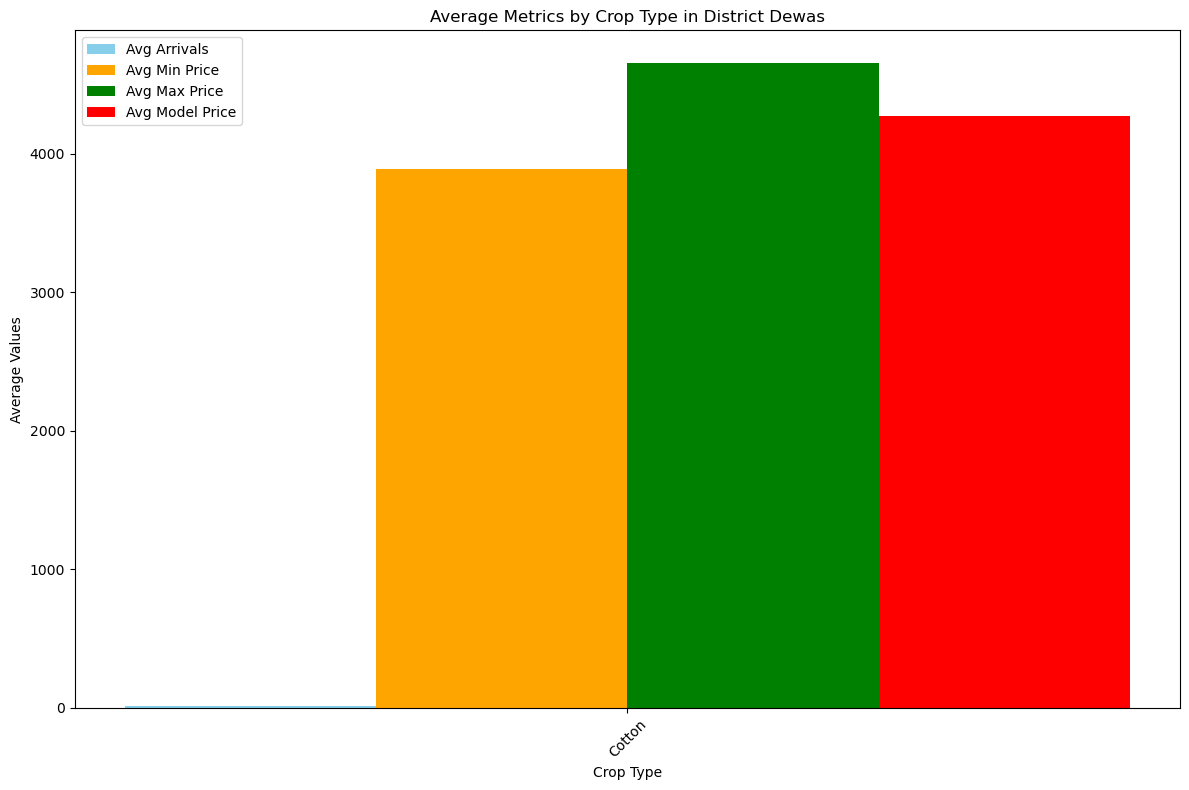

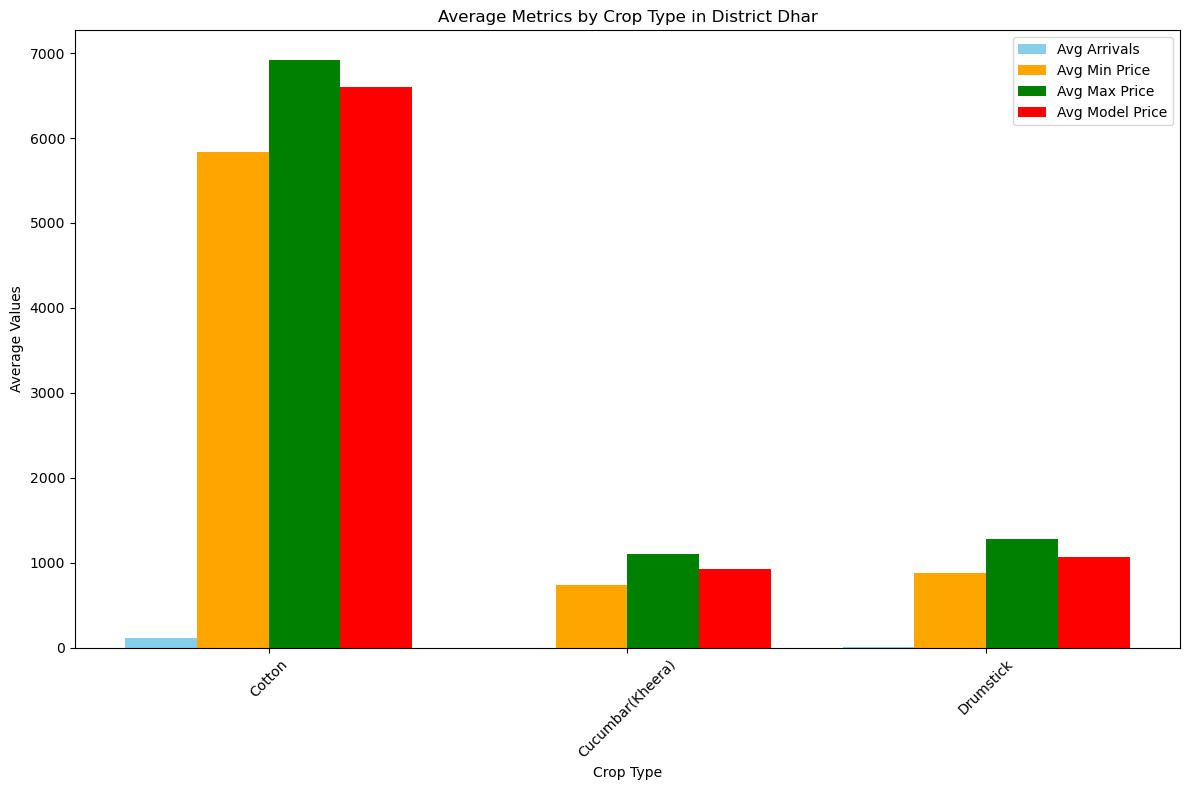

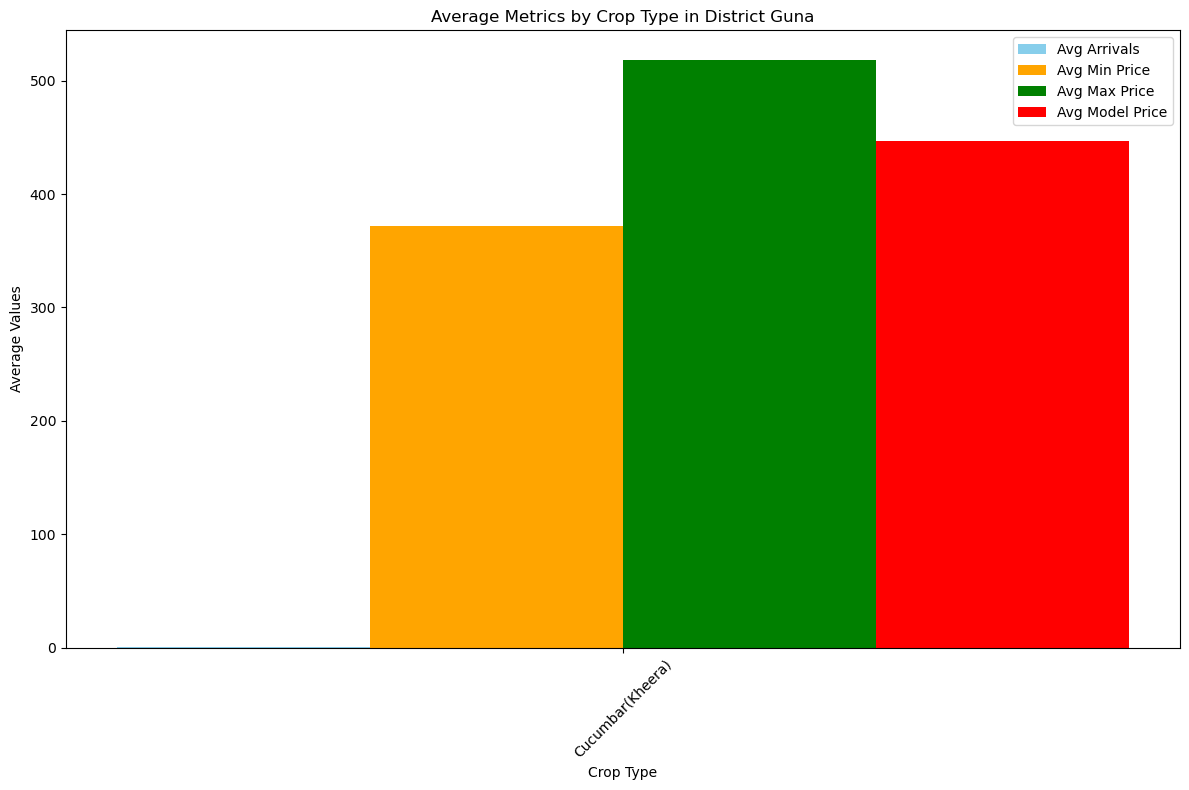

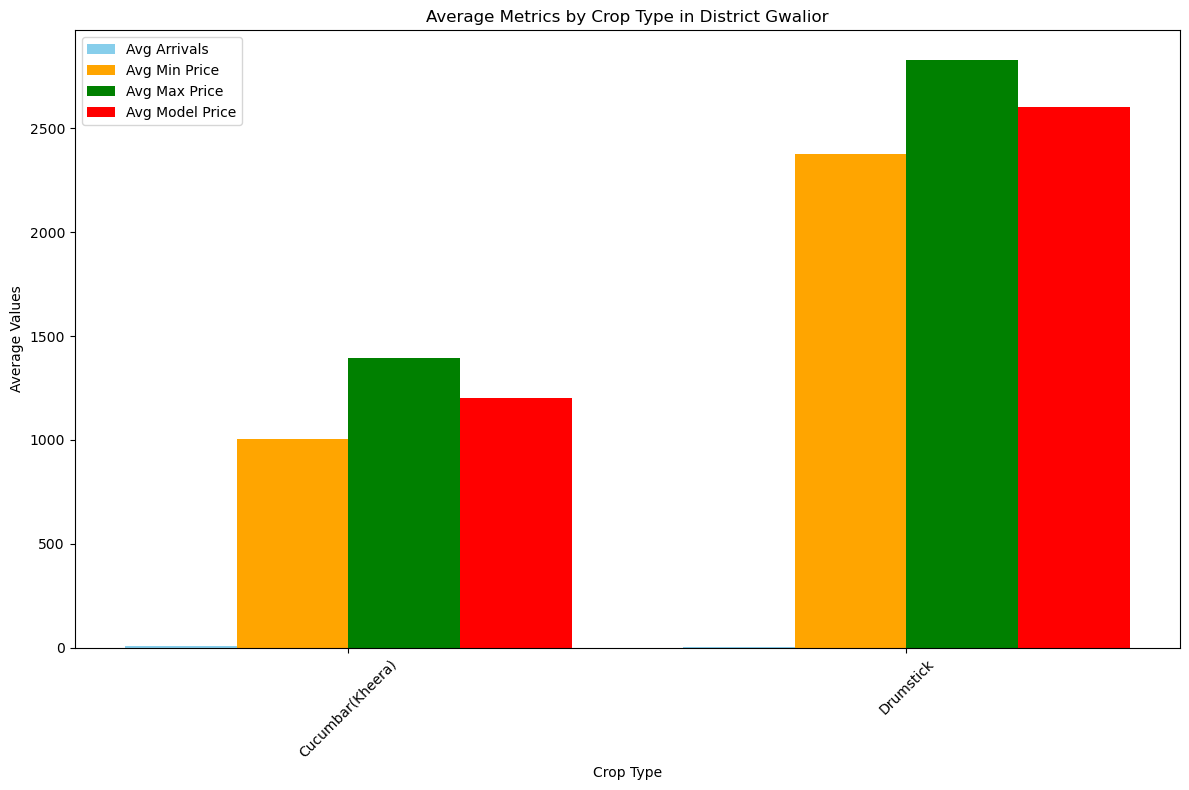

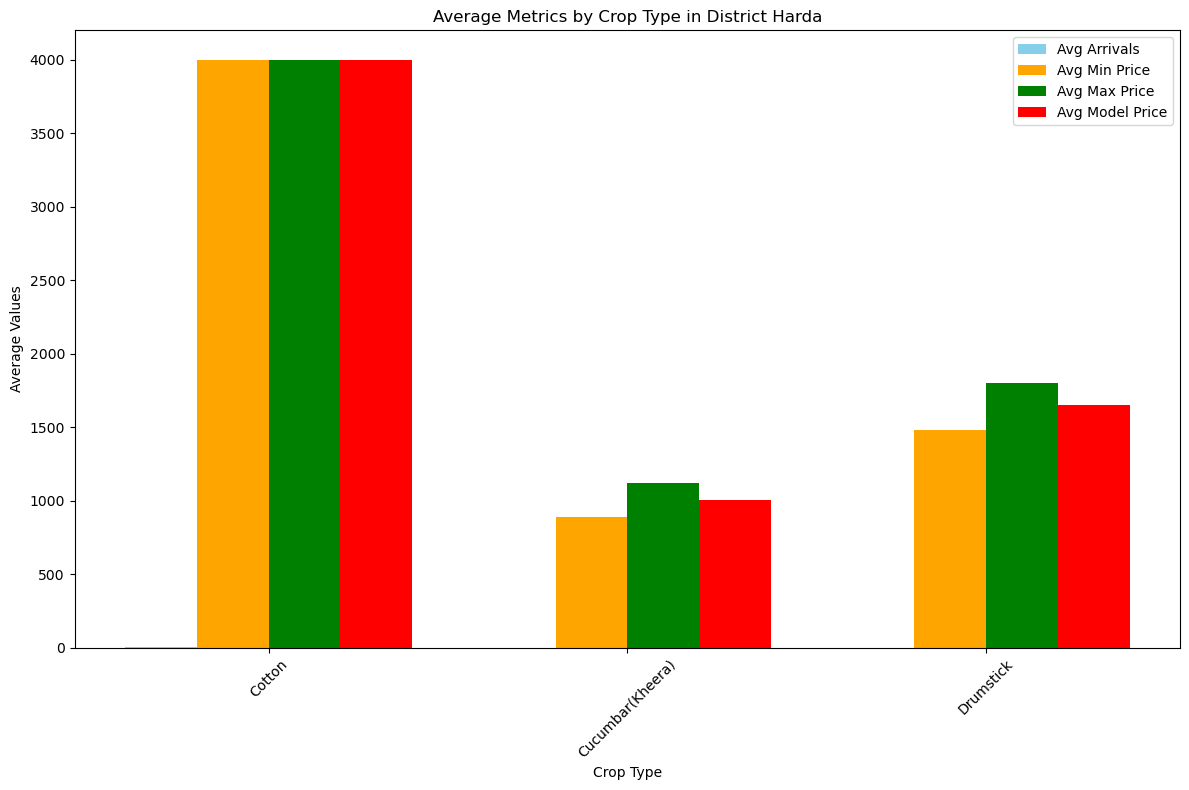

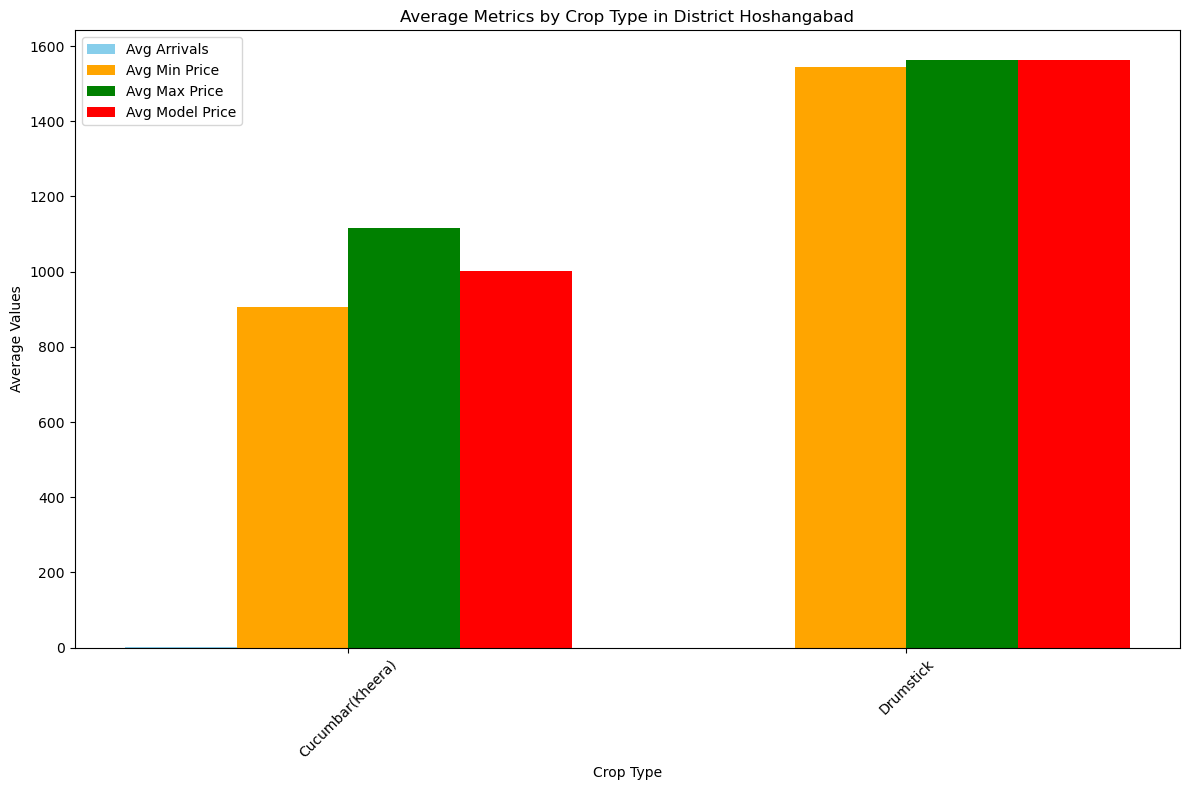

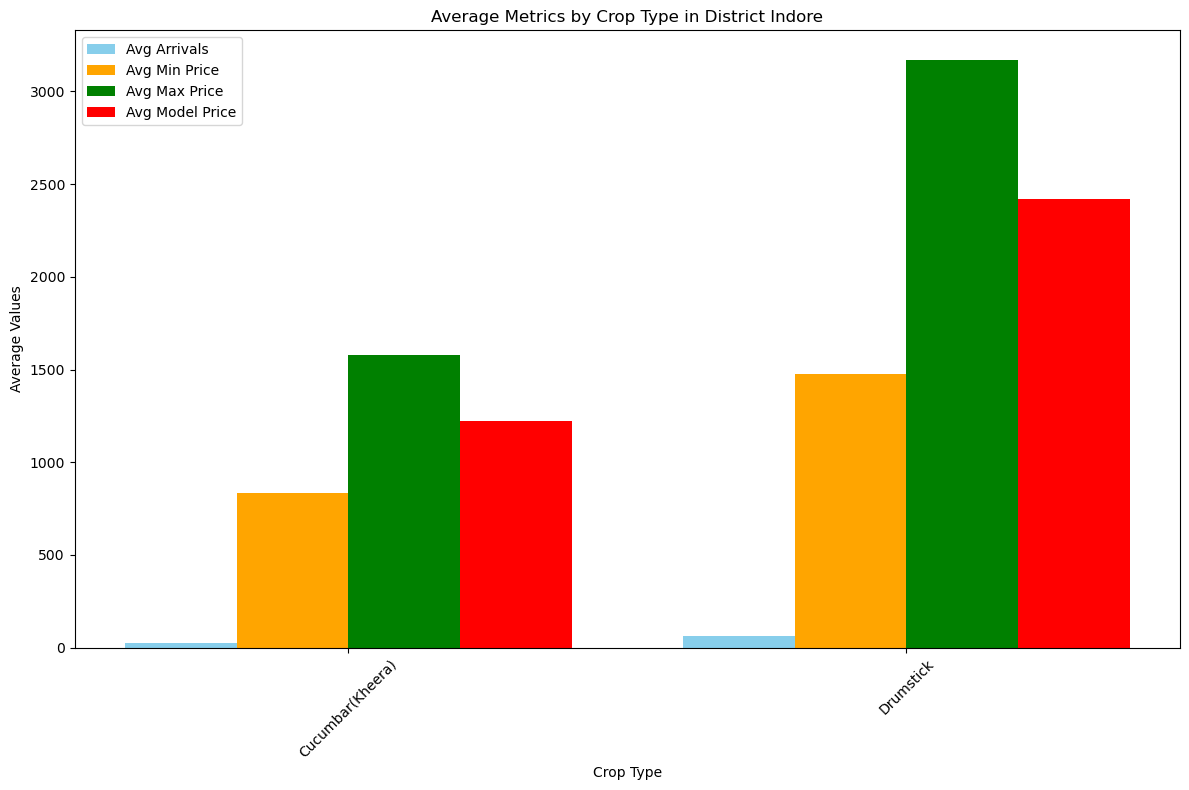

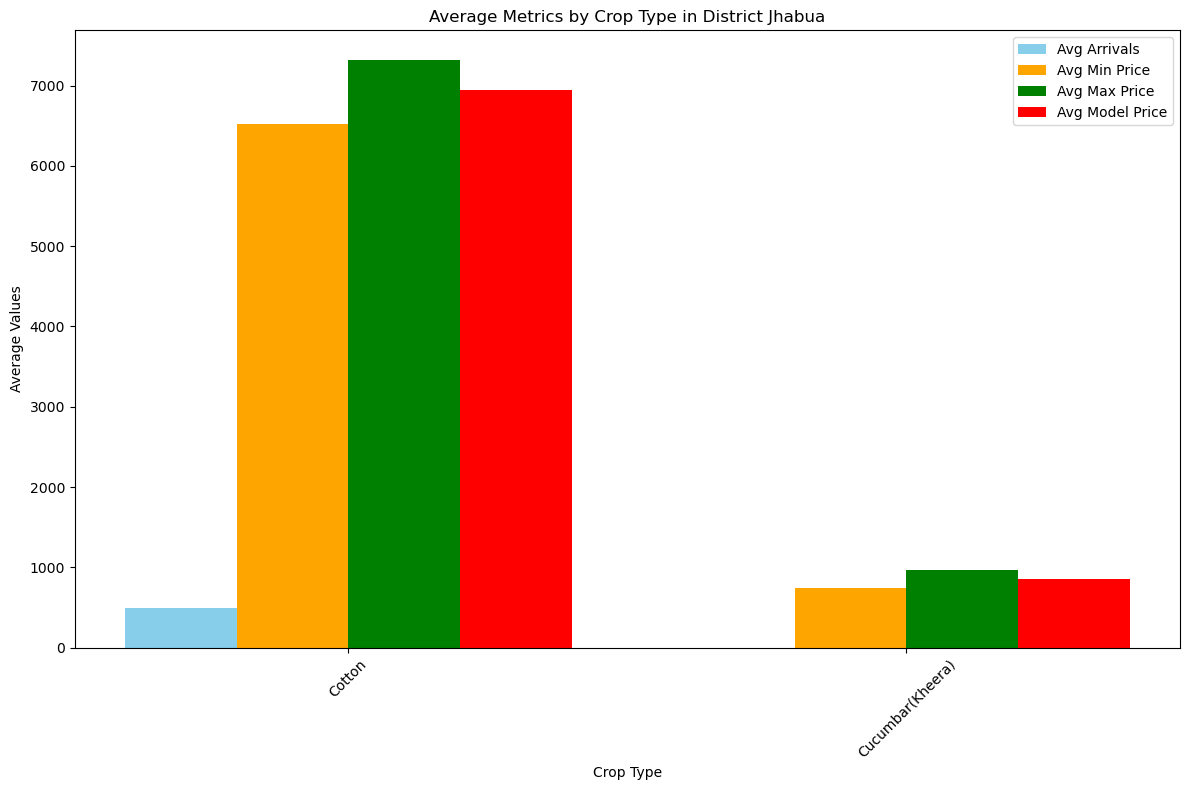

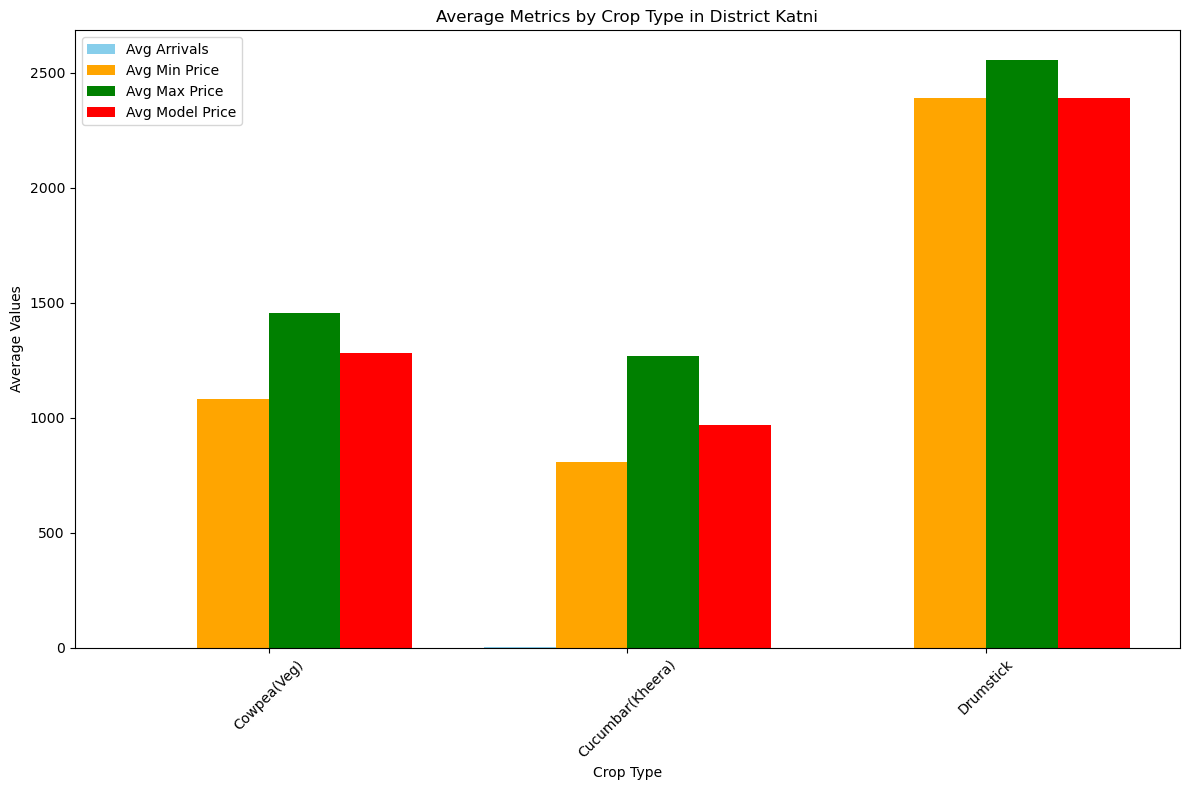

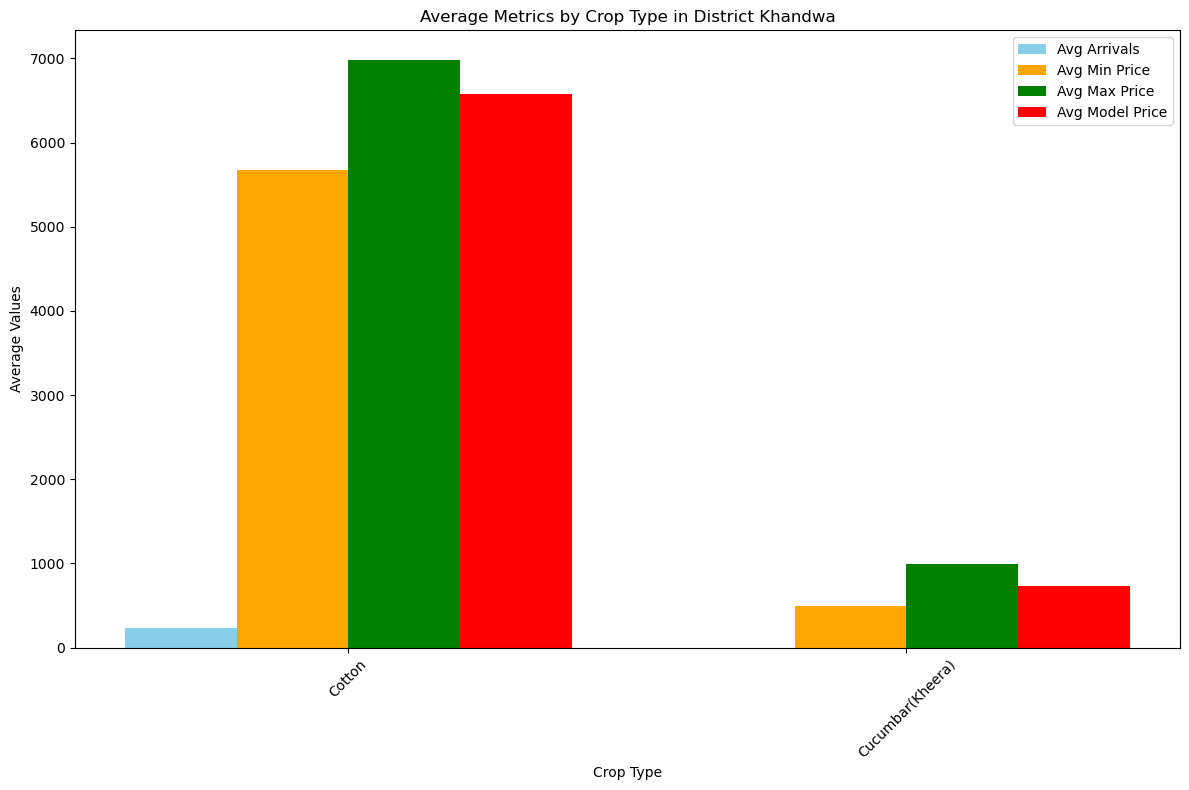

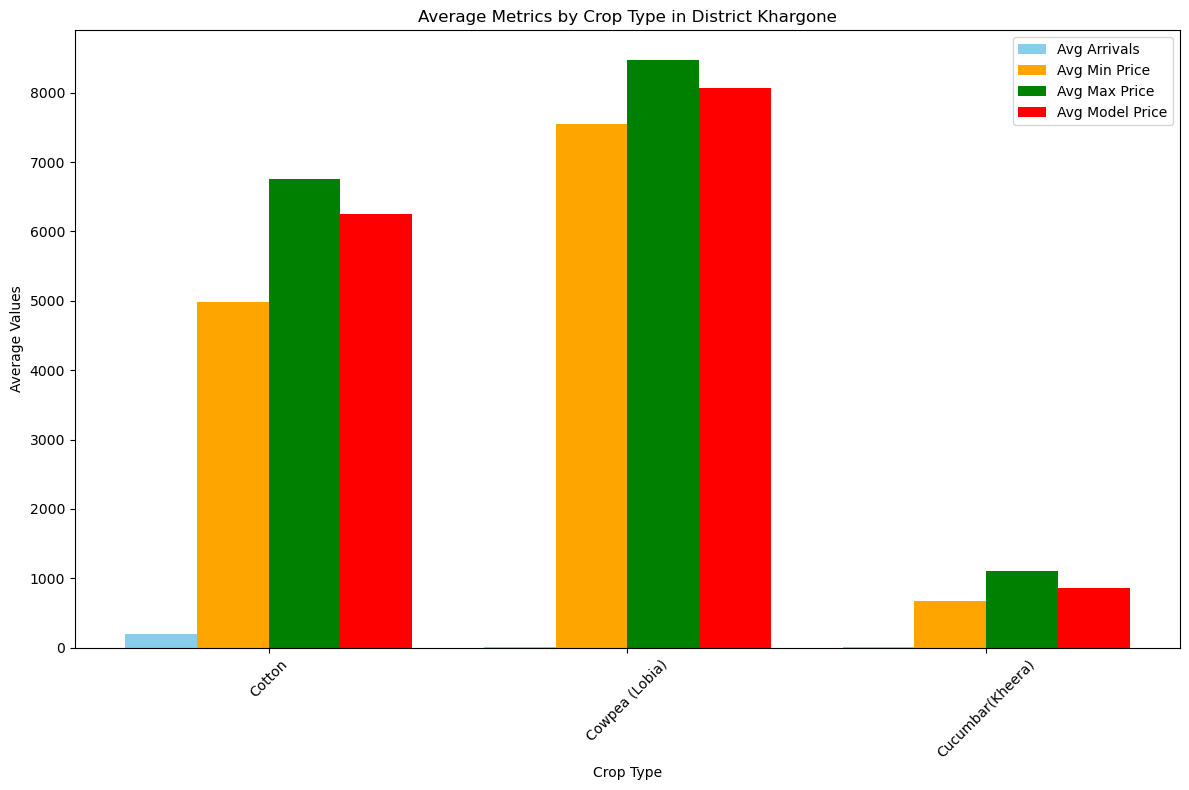

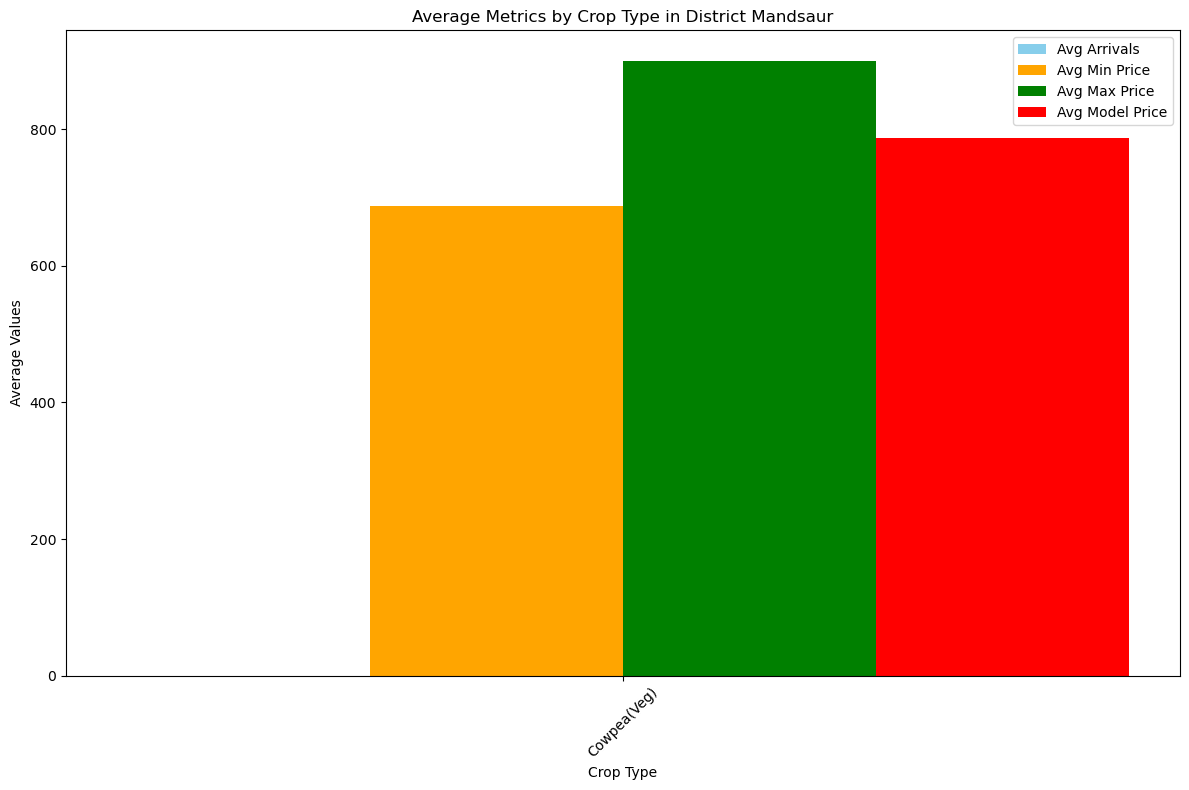

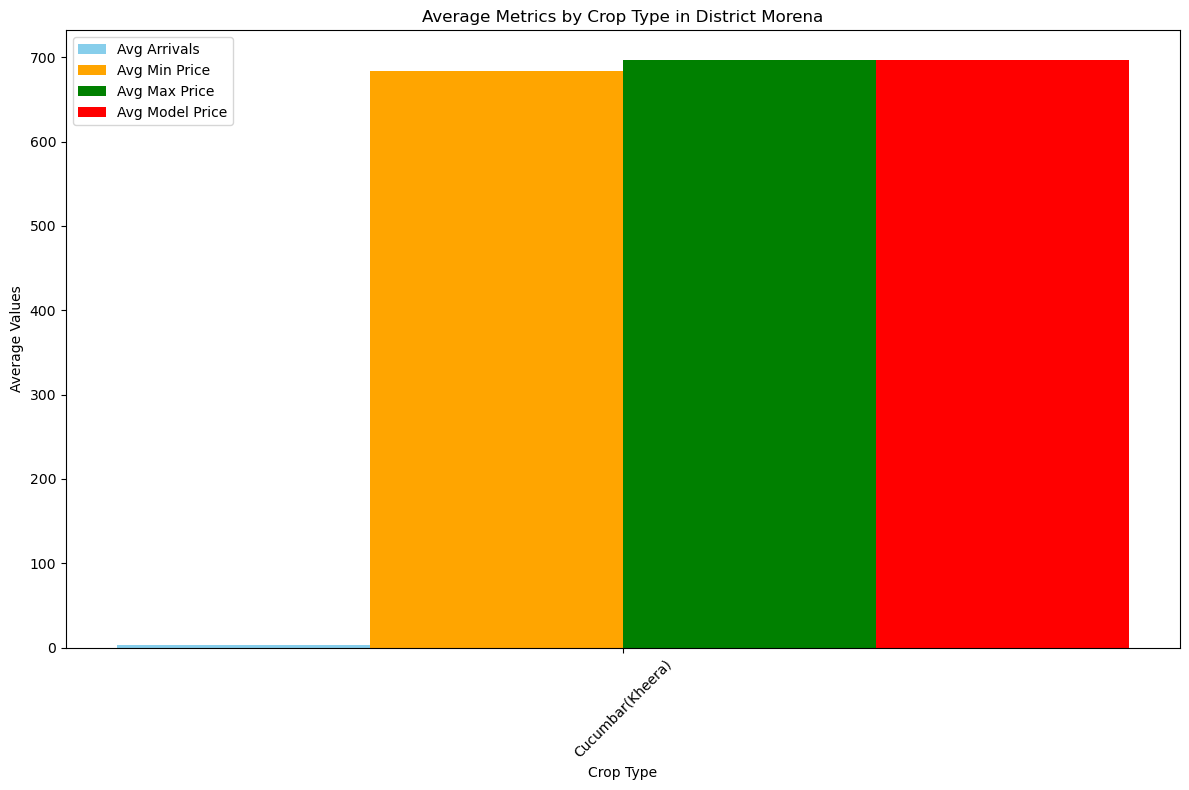

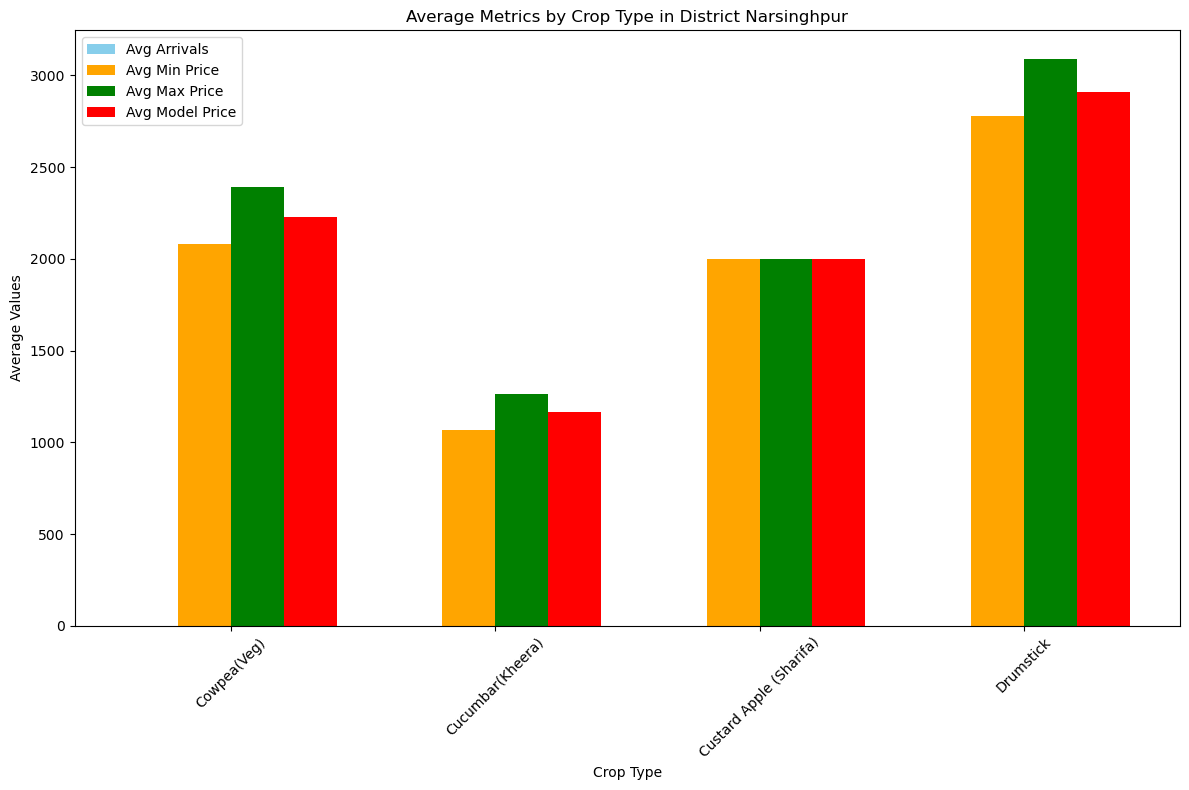

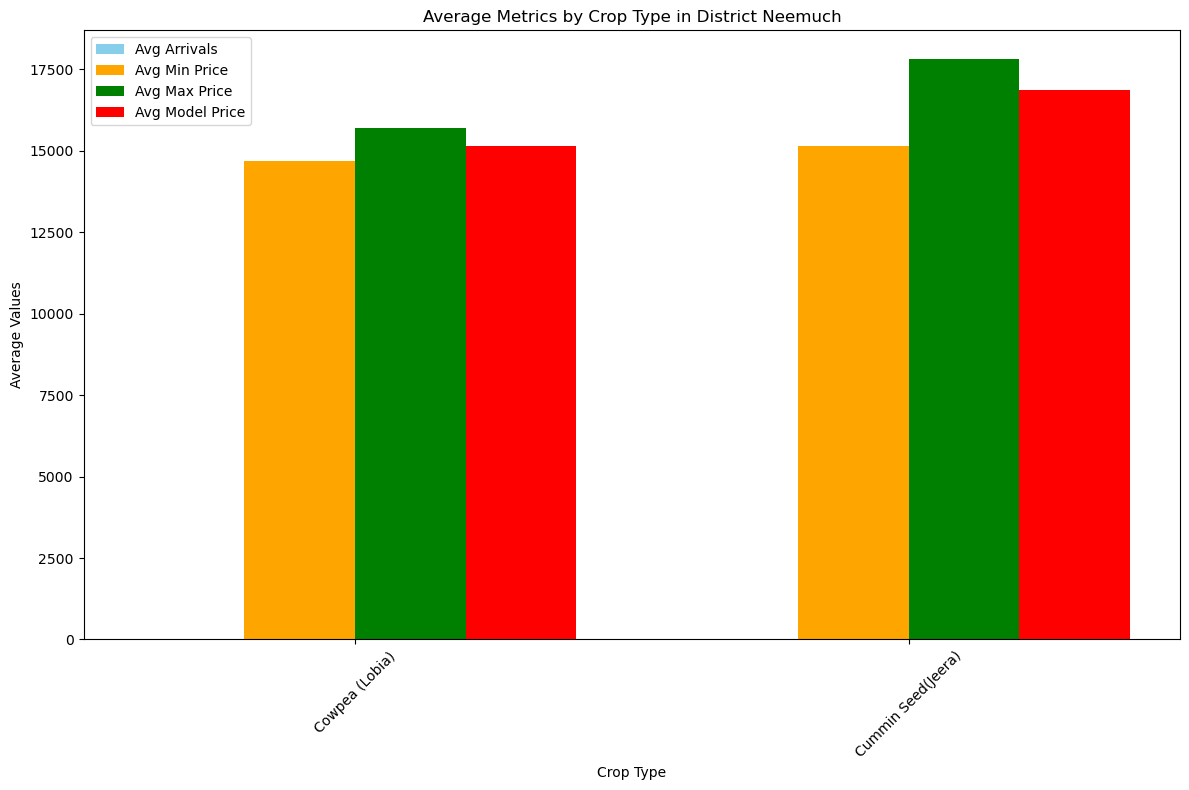

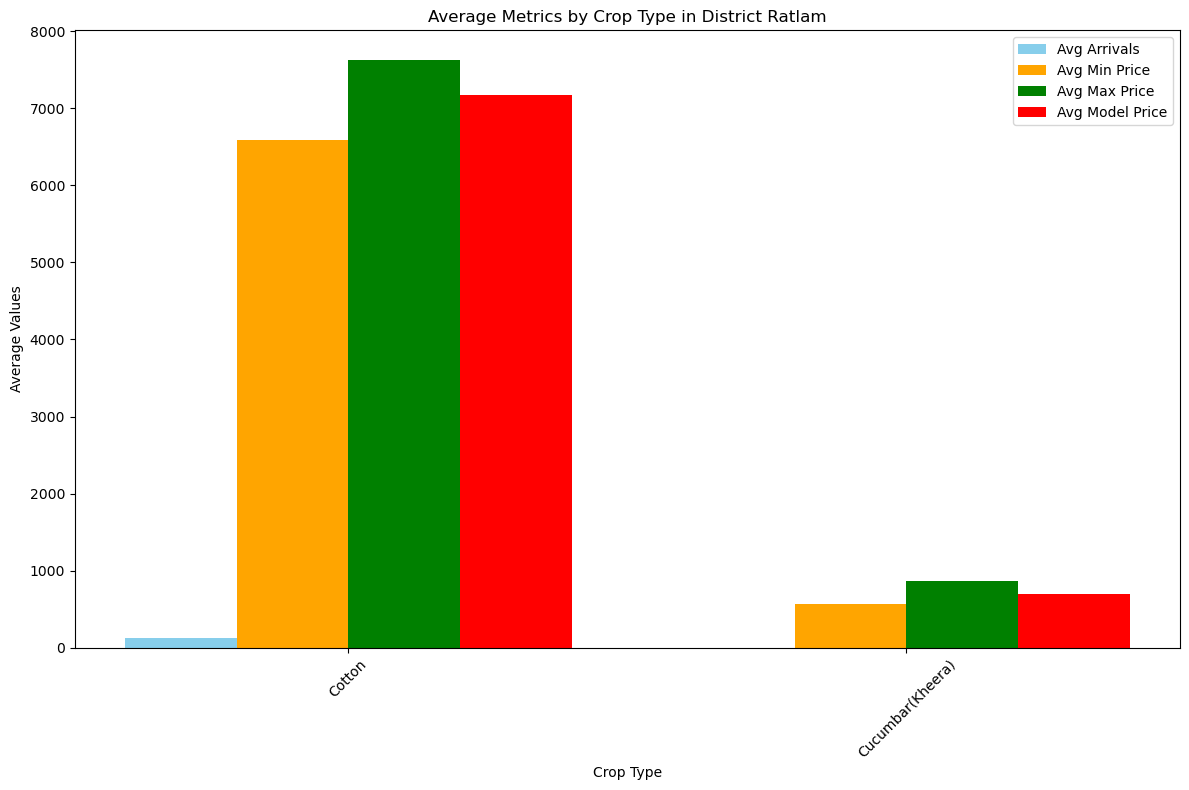

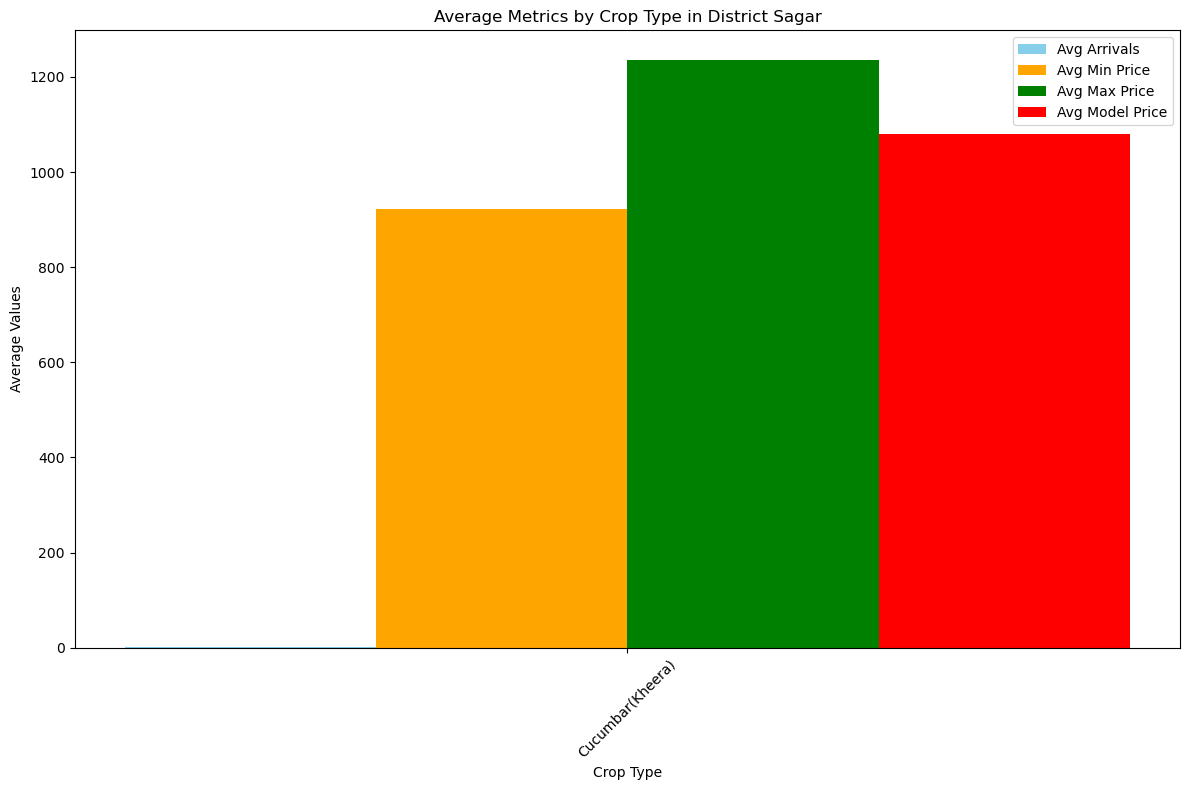

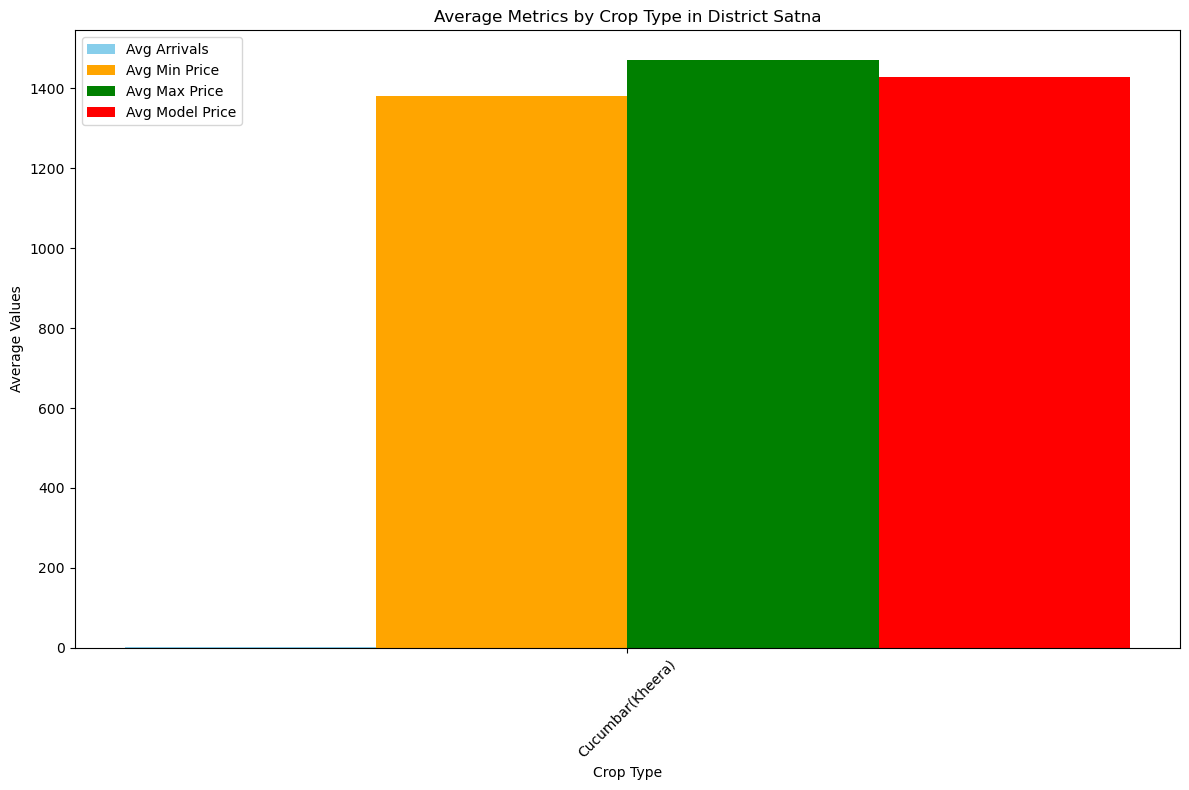

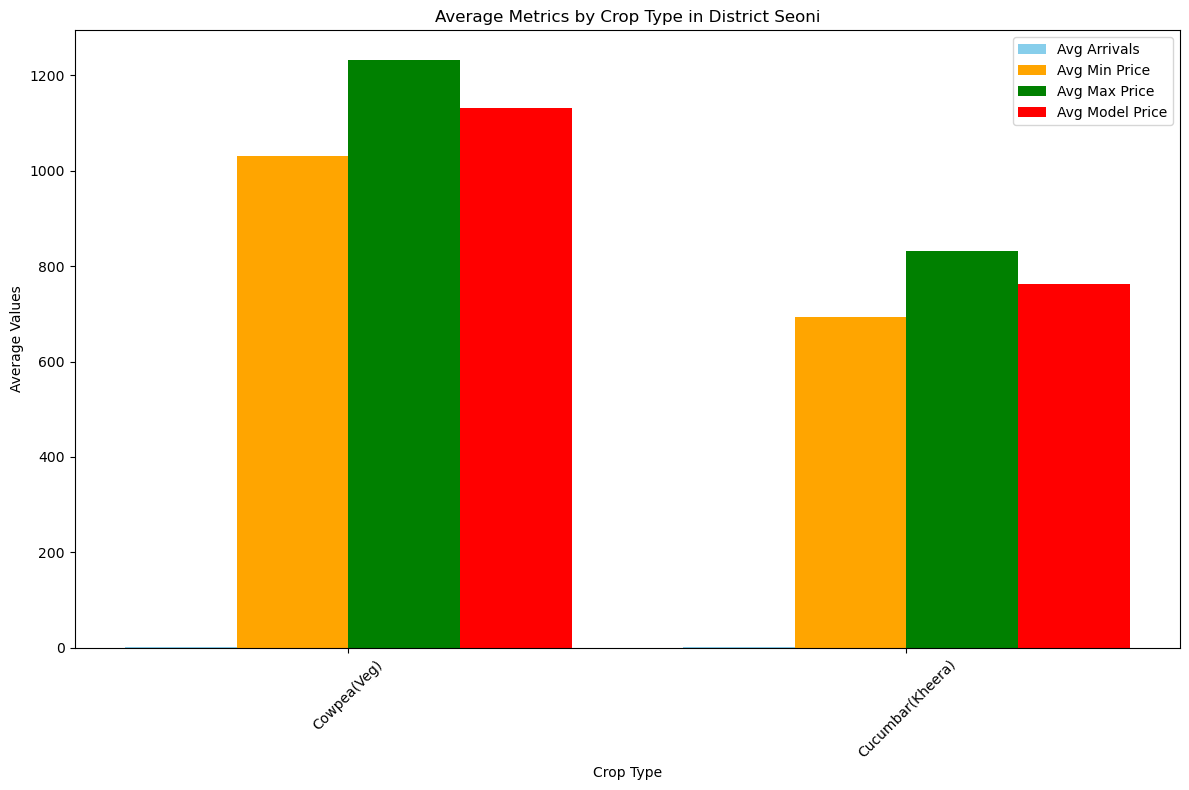

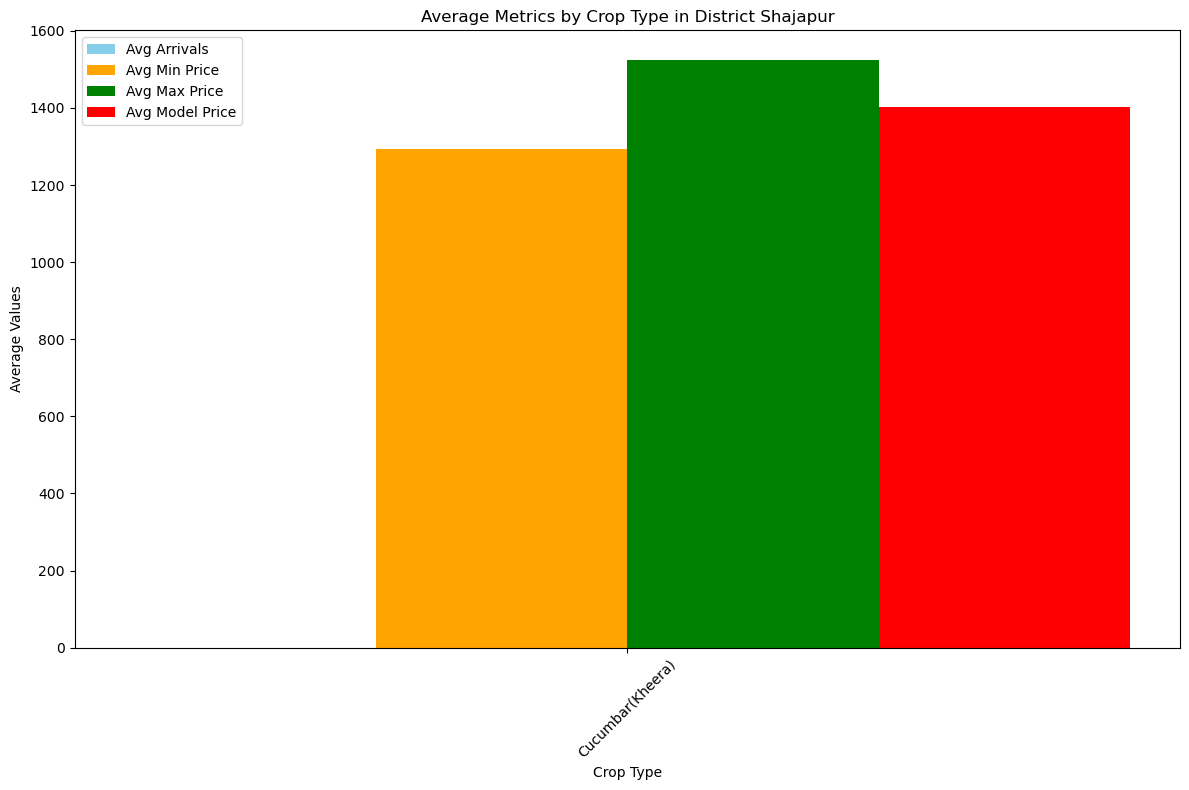

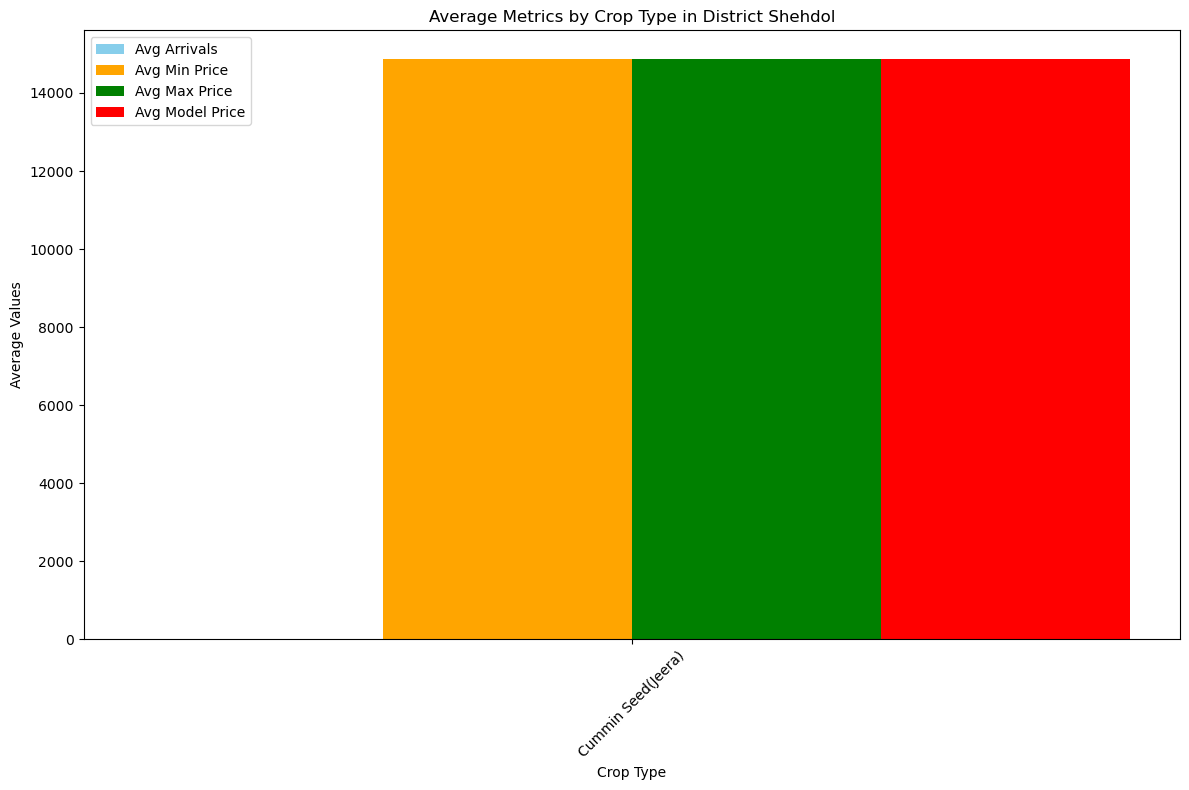

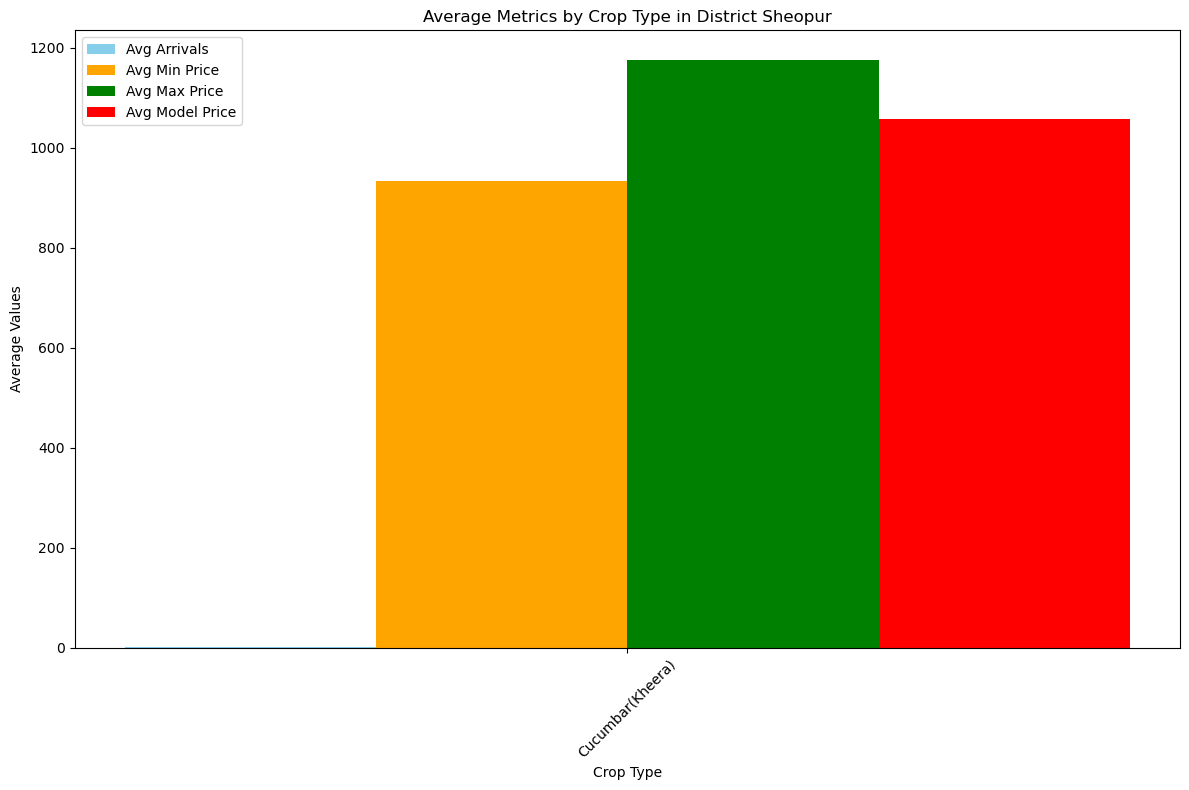

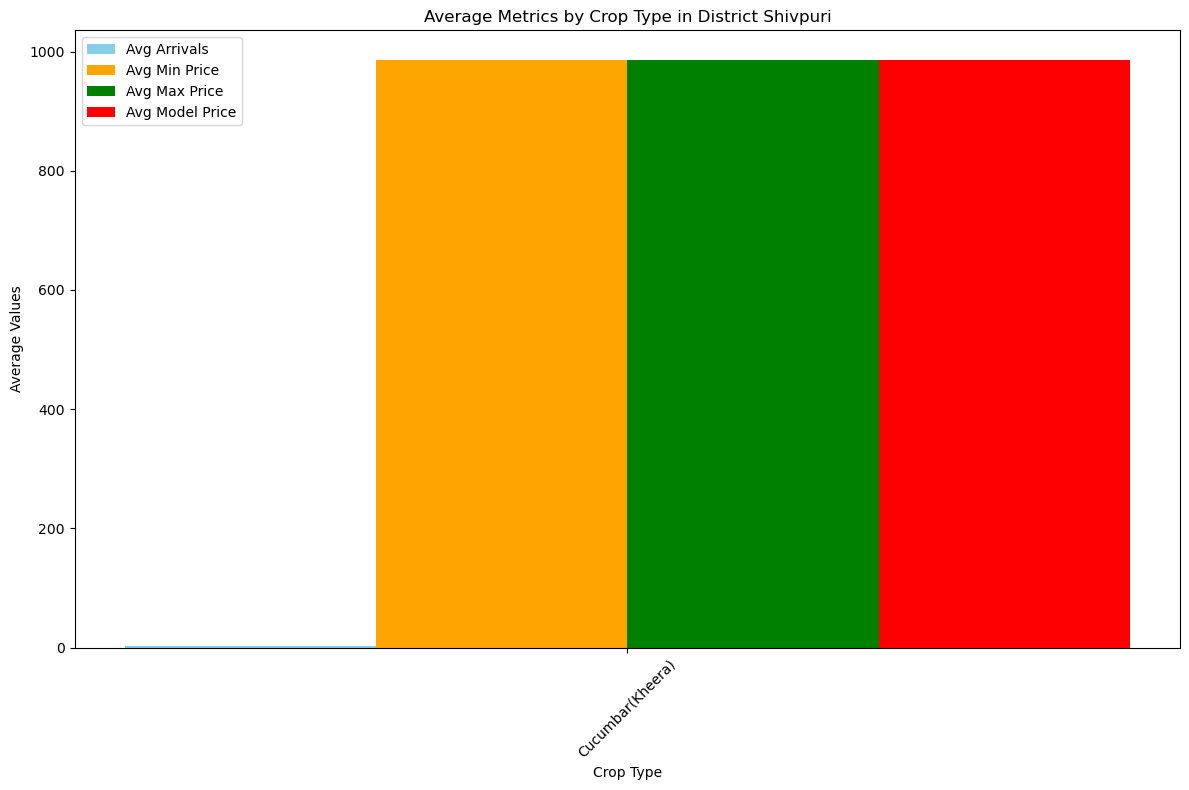

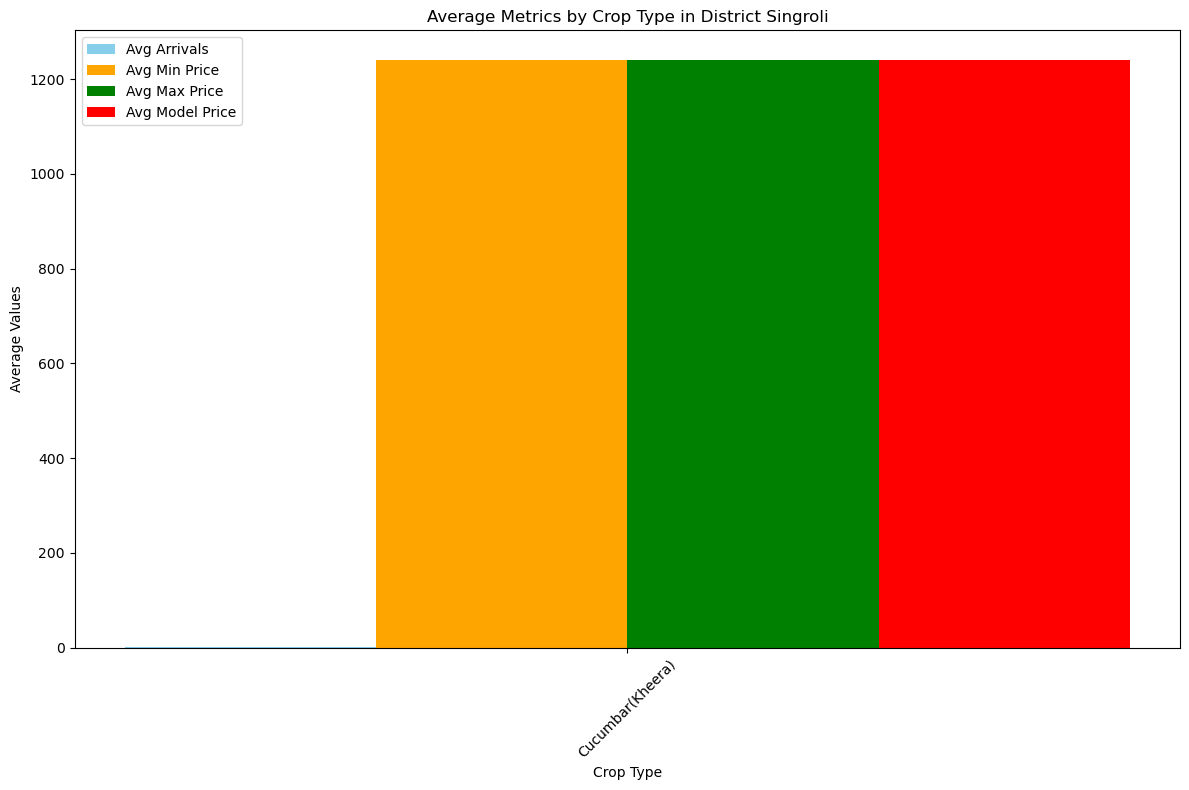

In [98]:
# Tareget : Find all the corps average Arraival in Tonnes and avg of min,max and model price of each corp

def generate_district_info(df):
    district_info = {}
    
    # Group data by district and crop type
    grouped = df.groupby(['District Name', 'crop_type'])
    
    for name, group in grouped:
        district = name[0]
        crop_type = name[1]
        
        # Calculate average arrivals
        avg_arrivals = group['Arrivals (Tonnes)'].mean()
        
        # Calculate average minimum price
        avg_min_price = group['Min Price (Rs./Quintal)'].mean()
        
        # Calculate average maximum price
        avg_max_price = group['Max Price (Rs./Quintal)'].mean()
        
        # Calculate average model price
        avg_model_price = group['Modal Price (Rs./Quintal)'].mean()
        
        # Store information for this district and crop type
        district_info.setdefault(district, []).append({
            'Crop_Type': crop_type,
            'Average_Arrivals': avg_arrivals,
            'Average_Min_Price': avg_min_price,
            'Average_Max_Price': avg_max_price,
            'Average_Model_Price': avg_model_price
        })
    
    return district_info

def visualize_district_info(district_info):
    for district, crops in district_info.items():
        crop_types = [crop['Crop_Type'] for crop in crops]
        avg_arrivals = [crop['Average_Arrivals'] for crop in crops]
        avg_min_prices = [crop['Average_Min_Price'] for crop in crops]
        avg_max_prices = [crop['Average_Max_Price'] for crop in crops]
        avg_model_prices = [crop['Average_Model_Price'] for crop in crops]
        
        bar_width = 0.2
        index = np.arange(len(crop_types))
        
        plt.figure(figsize=(12, 8))
        plt.bar(index, avg_arrivals, bar_width, label='Avg Arrivals', color='skyblue')
        plt.bar(index + bar_width, avg_min_prices, bar_width, label='Avg Min Price', color='orange')
        plt.bar(index + 2*bar_width, avg_max_prices, bar_width, label='Avg Max Price', color='green')
        plt.bar(index + 3*bar_width, avg_model_prices, bar_width, label='Avg Model Price', color='red')
        
        plt.xlabel('Crop Type')
        plt.ylabel('Average Values')
        plt.title(f'Average Metrics by Crop Type in District {district}')
        plt.xticks(index + 1.5*bar_width, crop_types, rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Example usage:
district_info = generate_district_info(df)
visualize_district_info(district_info)
